<center><h1> Projeto 2 - Ciência dos Dados</h1><center>

## Insper Instituto de Ensino e Pesquisa

<center><h5>Autor:
</h5></center>

<center><h5> João Gabriel Valentim Rocha
</h5></center>

## Índice

- [Introdução](#introducao)

    - [Entendendo a necessidade](#necessidade)
    
    - [Tumores Malignos e Benignos](#tumores)


- [Base de dados](#base)

    - [Descrição da Base de dados](#uci_describe)
    
    - [Tumores Malignos e Benignos](#tumores)

- [Objetivos](#objetivos)


- [Entendendo cada Feature](#features)


- [Importanto as bibliotecas necessárias](#bib)


- [Realizando limpeza dos dados](#limpeza)


- [Início da análise exploratória](#explora)

    - [Análise dos raios como features (mean, worst e SE)](#raio)
    
    - [Análise dos pontos de concavidade como features (mean, worst e SE)](#concavidade_pts)
    
    - [Análise da concavidade como feature (mean, worst e SE)](#concavidade)
    
    
- [Conclusão da Analise Exploratoria](#finalizando)


- [Introdução ao Machine Learning](#ml)


- [Métricas utilizadas](#metricas)


- [Introdução dos Modelos](#intro_modelos)


- [Primeiro Modelo - Random Forests](#rf_clf)


- [Primeiro Modelo - KNearest Neighbors](#rf_clf)


- [Segundo Modelo - Regressão Logística](#logistica)


- [Terceiro Modelo - DecisionTree](#decision)


- [Quarto Modelo - Random Forests](#forest)


- [Conclusão Geral](#conclusao2)


- [Aplicação prática do modelo](#aplicacao)


- [Referências](#referencia)

## Introdução
<div id="introducao"></div>

O avanço das ferramentas tecnológicas em consonância do avanço científico, trouxe melhorias significativas na área médica. Isso se deve sobretudo ao fato de que equipamentos mais sofisticados com maior poder instrumental dão a capacidade de investigar melhor o estado de saúde de uma paciente. Além disso, a utilização dessas ferramentas em novas pesquisas traz cada vez mais avanços em áreas que antes pareciam insolúveis. Uma outra perspectiva do assunto, é o enorme impacto que o aumento do poder computacional tem proporcionado nas áreas de saúde. Em específico, vamos destacar uma das mais delicadas e necessárias de investigação: O câncer.

O câncer foi caracterizado como uma doença heterogênea que consiste em muitos subtipos diferentes. O diagnóstico precoce
e o prognóstico de um tipo de câncer tornou-se uma necessidade na pesquisa do câncer, pois pode facilitar a subsequente avaliação clínica e o manejo de pacientes. A importância de classificar os pacientes com câncer em grupos de alto ou baixo risco tem levado muitas equipes de pesquisa, da área biomédica e bioinformática, a estudar a aplicação dos métodos de aprendizado de máquina (ML). 

Portanto, essas técnicas têm sido utilizadas com o objetivo de modelar a progressão e o tratamento de doenças cancerígenas. Além disso, a capacidade das ferramentas de ML de detectar os principais recursos de conjuntos de dados complexos revela sua importância. Uma variedade dessas técnicas, incluindo Redes Neurais Artificiais (RNAs), Redes Bayesianas (BNs),
Máquinas de vetores de suporte (SVMs) e árvores de decisão (DTs) têm sido amplamente aplicadas na pesquisa do câncer para o desenvolvimento de modelos preditivos, resultando em tomadas de decisão precisas e eficazes. Mesmo que seja evidente que
o uso de métodos de ML pode melhorar nossa compreensão da progressão do câncer, um nível apropriado de validação é
necessários para que esses métodos sejam considerados na prática clínica cotidiana. 

Neste trabalho, apresentamos uma revisão das abordagens recentes de ML empregadas na modelagem da progressão do câncer. Os modelos preditivos discutidos aqui são baseados em várias técnicas de ML supervisionadas. Dada a tendência crescente na aplicação de métodos de ML na pesquisa do câncer, **o objetivo deste trabalho é utilizar técnicas de ML para modelar e prever a classificação do diagnótico de pacientes: tumor benigno, ou tumor maligno (Câncer)**.

<img src="img_pp.png" style="float: center;padding:1rem;">

## Qual a necessidade de desenvolver ferramentas de previsão desse tipo? 
<div id="necessidade"></div>

É válido destacar que o câncer é uma alteração genética que não tem cura a princípio, porém, é possível tratar o paciente e obter sucesso se for diagnosticado precocemente. Nesse aspecto, utilizar as ferramentas computacionais de aprendizado de máquina promove ganhos significativos devido a previsão acertiva que muitas técnicas possuem. Esse auxílio pode promover o aumento da taxa de diagnósticos precoces, de tal forma que o paciente possa ser curado devido à rápida tomada de ação ainda quando em seu estado inicial. Portanto, é crucial que essas técnicas sejam cada vez mais exploradas.

### Tumores Benignos vs. Tumores Malignos
<div id="tumores"></div>

Os tumores benignos são constituídos por células bem semelhantes às que os originaram e não possuem a capacidade de provocar metástases. Já os malignos são agressivos e possuem a capacidade de infiltrar outros órgãos. **Por definição tumores malignos são câncer**.

<img src="assets/cells.jpg" style="float: center;padding:1rem;">

A multiplicação celular é “controlada” pelos chamados oncógenes ativadores, que regulam o crescimento e a morte da célula. No tumor benigno há uma mutação na estrutura genética dos oncógenes, mas nada capaz de “descontrolá-la”. O mesmo não ocorre com os tumores malignos, que crescem sem controle por conta da alteração genética.

* `Tumor benigno (B)`: Tem células que crescem lentamente e semelhante às do tecido normal. Na maioria dos casos pode ser totalmente removido (e o paciente curado) por meio de cirurgia.



* `Tumor maligno (M)`: As células multiplicam-se rapidamente e têm a capacidade de “invadir” estruturas próximas ao local de origem. **A cura neste tipo de tumor depende do diagnóstico precoce e do tratamento adotado**.

## Base de dados
<div id="base"></div>

Para acessar a base de dados que vamos utilizar para o presente projeto, basta clicar [aqui](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) e acessar o site do Centro de Machine Learning e Sistemas Inteligentes da UCI (University of California Irvine). 

### Diagnóstico de Cancer de Mama (Winconsin, UCI)
<div id="uci_describe"></div>

Para entendermos melhor o dataset, Vamo analisar a descrição das features e do target que serão utilizados:
- `ID number` (Identificação)
- `Diagnosis` (M = malignant, B = benign)

Dez features de valores reais são computadas para cada núcleo de célula:
- `radius` (Média de distância do centro para pontos no perímetro)
- `texture` (Desvio padrão em valores de escala de cinza)
- `perimeter` (Perímetro)
- `area` (Área)
- `smoothness` (Variação local em comprimentos de raio)
- `compactness` (perimeter^2 / area - 1.0)
- `concavity` (Gravidade de porções côncavas de contorno)
- `concave points` (Número de porções côncavas de contorno)
- `symmetry` (Simetria)
- `fractal dimension` ("coastline approximation" - 1)

### Descrição

Os recursos são calculados a partir de uma imagem digitalizada de uma agulha fina aspirado (FNA) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.

O plano de separação descrito acima foi obtido usando Árvore de métodos multisuperfície (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], um método de classificação que usa programação linear para construir uma árvore de decisão. Recursos relevantes foram selecionados usando uma pesquisa exaustiva no espaço de 1-4 features e 1-3 planos de separação.

O programa linear real usado para obter o plano de separação no espaço tridimensional é aquele descrito em: [K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34]
    
    
> A média (mean), erro padrão (SE) e "pior" (worst) ou maior (largest) (média dos três
maiores valores) dessas features foram calculadas para cada imagem,
resultando em 30 features. Por exemplo, o campo 3 é o raio médio, o campo
13 é o raio SE, o campo 23 é o pior raio.

Todos os valores de recursos são recodificados com quatro dígitos significativos.

## Objetivo
<div id="objetivos"></div>

> **1) Entender o perfil e as características das células de tecidos com tumores benignos e malignos.**

> **2) O objetivo deste trabalho é utilizar técnicas de ML para modelar e prever a classificação do diagnótico de pacientes: tumor benigno, ou tumor maligno (Câncer).**

### Entendendo como cada Feature foi calculada
<div id="features"></div>

Técnicas de processamento de imagem interativa, junto com um classificador indutivo baseado em programação linear, foram usadas para criar um sistema altamente preciso para o diagnóstico de tumores de mama. Uma pequena fração de uma lâmina de aspirado com agulha fina é selecionada e digitalizada. Com um interativo interface, o usuário inicializa modelos de contorno ativos, conhecidos como snakes, perto dos limites de um conjunto de núcleos celulares. 

As cobras personalizadas são deformadas na forma exata dos núcleos. Esse permite uma análise precisa e automatizada do tamanho, forma e textura do núcleo. Dez desses recursos são calculado para cada núcleo, e o valor médio, maior (ou "pior") valor e erro padrão de cada recurso é encontrado no intervalo de células isoladas.

<img src="assets/snakes.png" style="float: center;padding:0.6rem;">

Depois que 569 imagens foram analisadas desta forma, diferentes combinações de recursos foram testadas para encontrar aqueles que melhor separam as amostras benignas das malignas. Validação cruzada de dez vezes precisão de 97% foi alcançada usando um único plano de separação em três dos trinta recursos:

textura média, pior área e pior suavidade. Isso representa uma melhoria em relação ao melhor resultados diagnósticos na literatura médica. O sistema está atualmente em uso na Universidade de Wisconsin Hospitals. O mesmo conjunto de recursos também foi utilizado na tarefa muito mais difícil de prever a recorrência à distância de malignidade em pacientes, resultando em uma precisão de 86%.

O sistema de diagnóstico de visão computacional extrai dez características diferentes dos núcleos das células geradas pelos limites do método "Snake".

### 1. Raio (`radius`)
O raio de um núcleo individual é medido pela média do tamanho dos seguimentos de linha radial definido a partir do centroide da "Snake" até os pontos individuais das bordas.

### 2. Perímetro (`perimeter`)
A distância total entre os pontos do contorno constitui o perímetro nuclear.

### 3. Área (`area`)
A área nuclear é medida simplesmente contando o número de pixels no interior da "snake" e adicionando metade dos pixels no perímetro. (A = pi * R^2) ; (P = 2 * pi * R) = > A = (P/2) * R


### 4. Compacidade (`compactness`)
Perímetro e area foram combinadas para dar a medida de compacidade de uma celular nuclear usando a fórmula **(Perímetro^2 / Area)**. Esse número é adimensional, é minimizado quando analisamos um disco circular e cresce com o aumento da irregularidade das bordas. Contudo, esse valor pode aumentar com células mais alongadas, que por sua vez não indicam aumento da probabilidade de células malignas. 

### 5. Suavidade (`smoothness`)
A suavidade de um contorno nuclear é quantificada medindo a diferença entre o comprimento de uma linha radial e o comprimento médio das linhas ao seu redor.

### 6. Concavidade (`concavity`)
Em uma tentativa posterior de capturar as informações da forma, medimos o número e a gravidade das concavidades ou indentações no núcleo de uma célula. Nós desenhamos cordas entre pontos da snake não adjacentes e medimos o até que ponto o limite real do núcleo se encontra no interior de cada corda (veja a Figura 4).
Este parâmetro é muito afetado pelo comprimento desses acordes, já que cordas menores capturam melhor as pequenos concavidades. Optamos por enfatizar pequenos recuos, à medida que irregularidades de forma maiores são capturadas por outros recursos. 

### 7. Pontos de Concavidade (`concave_points`)
Este recurso é semelhante à Concavidade, mas mede apenas o número, ao invés da magnitude, de concavidades de contorno.

### 8. Simetria (`simmetry`)
Para medir a simetria, o eixo principal, ou corda mais longa através do centro, é encontrado. Nós então vamos medir a diferença de comprimento entre as linhas perpendiculares ao eixo principal até o limite da célula em ambas direcoes. 

### 9. Dimensão Fractal (`fractal_dimension`)
A dimensão fractal de uma célula é aproximada usando a "coastline approximation" descrita por Mandelbrot.9 O perímetro do núcleo é medido por meio de réguas cada vez maiores. Enquanto o tamanho da régua aumenta, diminuindo a precisão da medição, o perímetro observado diminui. Plotando esses valores em uma escala logarítmica e medindo a inclinação descendente dá (o negativo de) uma aproximação da dimensão fractal. Como acontece com todos os recursos de forma, um valor mais alto corresponde a um contorno menos regular e, portanto, a uma maior probabilidade de malignidade.

### 10. Textura (`texture`)
A textura do núcleo da célula é medida encontrando a variância das intensidades da escala de cinza no
pixels do componente.

------------------------------------------------------------

### Importanto as bibliotecas necessárias
<div id="bib"></div>

In [269]:
%matplotlib inline
# Importando pandas
import pandas as pd

# Importando bibliotecas gráficas e de cálculos
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os

#Ignorando avisos de limite
import warnings

warnings.filterwarnings('ignore')

# Importando a biblioteca stats
from scipy import stats

# Lambda function
log_scale = lambda x: np.log10(1+x)

# Graph 3D
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, precision_score, recall_score, f1_score, roc_curve, plot_confusion_matrix, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### Abrindo o dataset para leitura

In [270]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Desktop\Matérias 2 semestre\cdados\Breast_Cancer_Wisconsin-1


In [271]:
filename = 'data.csv'
data = pd.read_csv(filename)
data.head(15)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   

    ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0   ...          17.33           184.60      2019.0            0.1622   
1   ...          23.41           158.80      1956.0            0.1238   
2   ...          25.53           152.50      1709.0            0.1444   
3   ...          26.50            98.87       567.7            0.2098   
4   ...          16.67           152.20      1575.0            0.1374   
5   ...          23.75           103.40       741.6            0.1791   
6   ...          27.66           153.20      1606.0            0.1442   
7   ...          28.14           110.60       897.0            0.1654   
8   ...          30.73           106.20       739.3            0.1703   
9   ...          40.68            97.65       711.4            0.1853   
10  ...          33.88           123.80      1150.0            0.1181   
11  ...          27.28           136.50      1299.0            0.1396   
12  ...          29.94           151.70      1332.0            0.1037   
13  ...          27.66           112.00       876.5            0.1131   
14  ...          32.01           108.80       697.7            0.1651   

    compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.6656           0.7119               0.26540          0.4601   
1              0.1866           0.2416               0.18600          0.2750   
2              0.4245           0.4504               0.24300          0

In [272]:
print(f'Esse arquivo tem {data.shape[0]} instâncias com {data.shape[1]} features')

Esse arquivo tem 569 instâncias com 33 features


In [273]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

## Realizando limpeza da base de dados
<div id="limpeza"></div>

Para começar a explorar os dados, é necessário que façamos uma limpeza na base de dados.

In [274]:
data = data.drop(['Unnamed: 32'],axis=1)
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [275]:
data.columns.to_list()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### Seleção de features

Vamos separar as features do target.

In [276]:
X = pd.DataFrame(data.iloc[:, 2:])
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

### Seleção de target

In [277]:
y = pd.DataFrame(data.iloc[:, 1])
y

diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]

### Selecionando as features mais relevantes

É importante para o estudo presente que possamos focar nas colunas (features) que mais nos ajudarão a prever o diagnóstico do paciente. Para tanto, é possível fazer um estudo do grau de relevância de cada uma delas separadamente. A partir do score atribuido a cada feature, será possível descartar as features menos relevantes. Dessa forma, podemos focar nas que mais influênciam a classificação.

### Utilização do SelectKBest

A classe SelectKBest apenas pontua os recursos usando uma função (nesse caso, f_classif, mas podem ser outros, chi2, por exemplo) e, em seguida, "remove todos os recursos de pontuação mais altos, exceto os k". Isso pode ser visto na própria documentação do Sklearn, clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) para analisar.

> "Select features according to the k highest scores."

Além disso, vale ressaltar que o score para a classificação de relevância da feature independe do modelo preditivo que poderá ser utilizado mais adiante.

In [278]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Criando um objeto com a score function f_classif
fit_feat = SelectKBest(score_func=f_classif)
fit_feat.fit(X, y)

# Cria uma coluna com os scores
score_col = pd.DataFrame(fit_feat.scores_, columns=['Score Values'])

# Cria uma coluna com os nomes das features
name_columns = pd.DataFrame(X.columns, columns=['Features'])

# Junta numa tabela
feat = pd.concat([name_columns, score_col], axis=1)
feat

Features  Score Values
0               radius_mean    646.981021
1              texture_mean    118.096059
2            perimeter_mean    697.235272
3                 area_mean    573.060747
4           smoothness_mean     83.651123
5          compactness_mean    313.233079
6            concavity_mean    533.793126
7       concave points_mean    861.676020
8             symmetry_mean     69.527444
9    fractal_dimension_mean      0.093459
10                radius_se    268.840327
11               texture_se      0.039095
12             perimeter_se    253.897392
13                  area_se    243.651586
14            smoothness_se      2.557968
15           compactness_se     53.247339
16             concavity_se     39.014482
17        concave points_se    113.262760
18              symmetry_se      0.024117
19     fractal_dimension_se      3.468275
20             radius_worst    860.781707
21            texture_worst    149.596905
22          perimeter_worst    897.944219
23               area_worst    661.600206
24         smoothness_worst    122.472880
25        compactness_worst    304.341063
26          concavity_worst    436.691939
27     concave points_worst    964.385393
28           symmetry_worst    118.860232
29  fractal_dimension_worst     66.443961

### Como escolher as melhores features?

Agora que temos uma função de score, atribuindo o grau de relevância a cada feature, vamos ordenar a nossa tabela do menor para o maior. Dessa forma, no topo vão se encontrar as features menos relavantes, ou seja, as que possuem menor score.

In [279]:
# Ordena a tabela
feat.sort_values(by='Score Values')

Features  Score Values
18              symmetry_se      0.024117
11               texture_se      0.039095
9    fractal_dimension_mean      0.093459
14            smoothness_se      2.557968
19     fractal_dimension_se      3.468275
16             concavity_se     39.014482
15           compactness_se     53.247339
29  fractal_dimension_worst     66.443961
8             symmetry_mean     69.527444
4           smoothness_mean     83.651123
17        concave points_se    113.262760
1              texture_mean    118.096059
28           symmetry_worst    118.860232
24         smoothness_worst    122.472880
21            texture_worst    149.596905
13                  area_se    243.651586
12             perimeter_se    253.897392
10                radius_se    268.840327
25        compactness_worst    304.341063
5          compactness_mean    313.233079
26          concavity_worst    436.691939
6            concavity_mean    533.793126
3                 area_mean    573.060747
0               radius_mean    646.981021
23               area_worst    661.600206
2            perimeter_mean    697.235272
20             radius_worst    860.781707
7       concave points_mean    861.676020
22          perimeter_worst    897.944219
27     concave points_worst    964.385393

Aqui encontramos as 4 primeiras menos relevantes features. Dessa forma, é possível realizar uma redução de dimensionalidade retirando as seguintes features:
- `symmetry_se`
- `texture_se`
- `fractal_dimension_mean`
- `smoothness_se`
- `fractal_dimension_se	`

In [280]:
# Retirando as features que não queremos
X = X.drop(['symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se', 'fractal_dimension_se'], axis=1)

In [281]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     radius_se  ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0       1.0950  ...        25.380          17.33           184.60      2019.0   
1       0.5435  ...        24.990          23.41           158.80      1956.0   
2       0.7456  ...        23.570          25.53           152.50      1709.0   
3       0.4956  ...        14.910          26.50            98.87       567.7   
4       0.7572  ...        22.540          16.67           152.20      1575.0   
..         ...  ...           ...            ...              ...         ...   
564     1.1760  ...        25.450          26.40           166.10      2027.0   
565     0.7655  ...        23.690          38.25           155.00      1731.0   
566     0.4564  ...        18.980          34.12           126.70      1124.0   
567     0.7260  ...        25.740          39.42           184.60      1821.0   
568     0.3857  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

### LabelEnconder

Vamos utilizar o LabelEncoder para modificar o label do target para uma array com valores inteiros. Isso é feito pois pode auxiliar a acurácia da classificação para alguns modelos preditivos. 

Alguns algoritmos de ML, como baseado em árvore (Decision Tree, Random Forest), fazem um trabalho melhor no tratamento de variáveis categóricas. A melhor prática em qualquer projeto de ciência de dados é transformar dados categóricos em um valor numérico.

Para analisar o funcionamento mais a fundo do LabelEncoder, basta clicar [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) e checar a documentação do Sklearn. 



In [282]:
# Importando a bibliotecado sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler

# "Encode target labels with value between 0 and n_classes-1."
label = LabelEncoder()
label

LabelEncoder()

In [283]:
label.fit(y)
label.classes_

array(['B', 'M'], dtype=object)

In [284]:
y_ = y.copy()

In [285]:
y = label.transform(y)

In [286]:
# Aplicamos a transformação e agora temos um target numérico
y[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [287]:
# Note que podemos aplicar a transformação inversa
label.inverse_transform(y)[0:30]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M'], dtype=object)

# Início da análise exploratória
<div id='explora'><\div>

## Contagem de benignos e malignos

Vamos fazer um estudo a respeito da nossa base dados. Inicialmente, vamos analisar qual a proporção entre tecidos diagnosticados como malignos (M) e benignos (B).

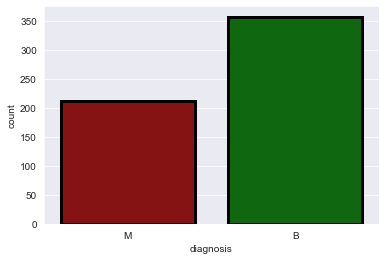

In [288]:
sb.countplot(data = data, x="diagnosis", palette=["#990000","#007700"], edgecolor="black", lw=3);

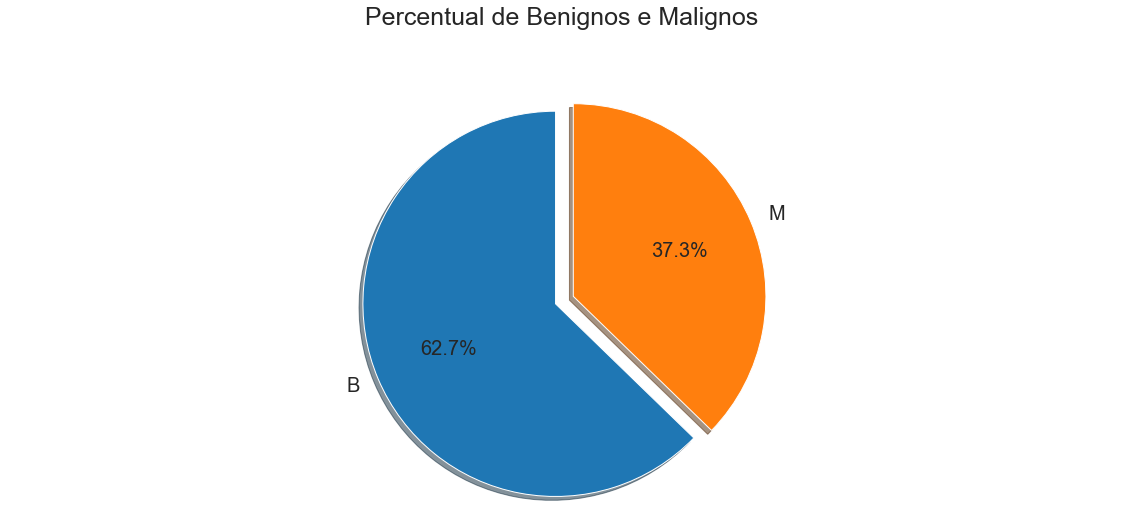

In [289]:
labels = 'B', 'M'
sizes = y_.value_counts(normalize=True).to_list()
explode = (0, 0.1) 

plt.figure(figsize=(20,8))
plt.title('Percentual de Benignos e Malignos \n\n',size=25)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,
        textprops={'size':20})
plt.axis('equal') 

plt.show()

## Raio do núcleo celular (mean, worst e SE)
<div id='raio'></div>

Vamos analisar detalhadamente o `raio` (`radius`) dos núcleos celulares dos tecidos. 

### Raio médio (`radius_mean`)

Vamos analisar um histograma que compara os raios médios dos núcleos celulares para os dois casos de diagnóstico (M e B):

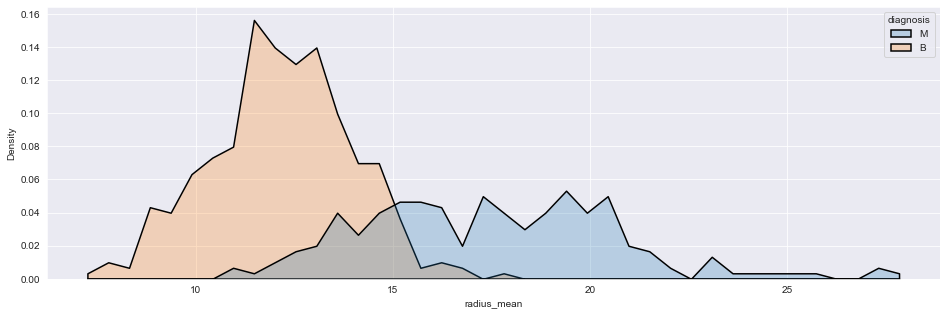

In [290]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="radius_mean", hue="diagnosis", stat='density', element="poly",edgecolor="black",lw=1.5,bins=40,log_scale=False);

- **Pela figura acima, podemos notar que o raio médio para tecidos com câncer pode atingir valores maiores do que tecidos sem câncer.** Isso pode ser afirmado pelo fato do gráfico azul escuro atingir valores maiores do que o gráfico verde claro.

### Raio "pior" (`radius_mean`)

Vamos analisar um histograma que compara os raios piores dos núcleos celulares para os dois casos de diagnóstico (M e B):

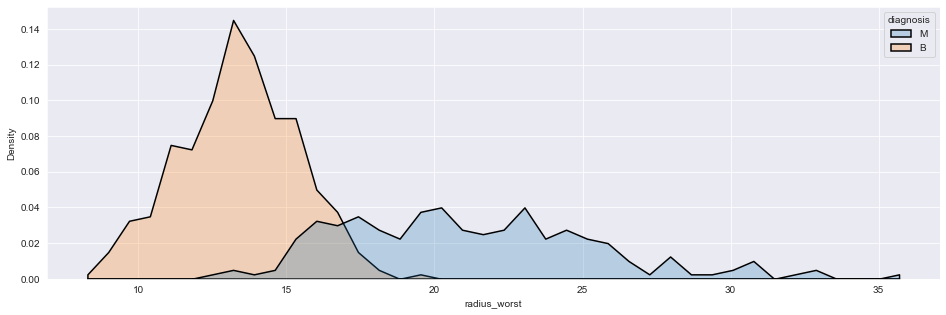

In [291]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="radius_worst", hue="diagnosis", stat='density', element="poly",edgecolor="black",lw=1.5,bins=40,log_scale=False);

- **Pela figura acima, podemos notar que o raio pior para tecidos com câncer pode atingir valores maiores do que tecidos sem câncer.** Isso pode ser afirmado pelo fato do gráfico azul escuro atingir valores maiores do que o gráfico verde claro.

### Erro padrão do raio (`radius_SE`)

Vamos analisar um histograma que compara os erros padrões dos núcleos celulares para os dois casos de diagnóstico (M e B):

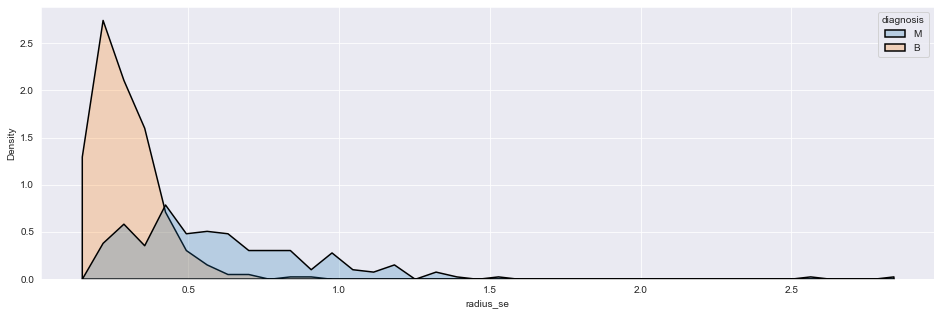

In [292]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="radius_se", hue="diagnosis", stat='density', element='poly',edgecolor="black",lw=1.5,bins=40,log_scale=False);

- **Pela figura acima, podemos notar que o erro padrão do erro do raio para tecidos com câncer possui uma variabilidade maior.** Isso parece bastante plausível, pelo fato de que é de se esperar que exista maior irregularidade em células de tecido com câncer.

#### Histograma Separados

Vamos analisar agora cada histograma separadamente. Nesse contexto, será possível visualizar a qual distribuição o gráfico pode seguir. Para tanto, vamos usar o `probplot` para tentar investigar isso melhor. 

#### Benignos

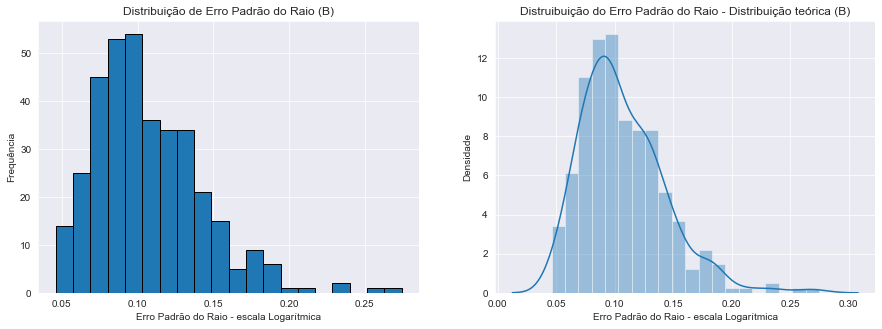

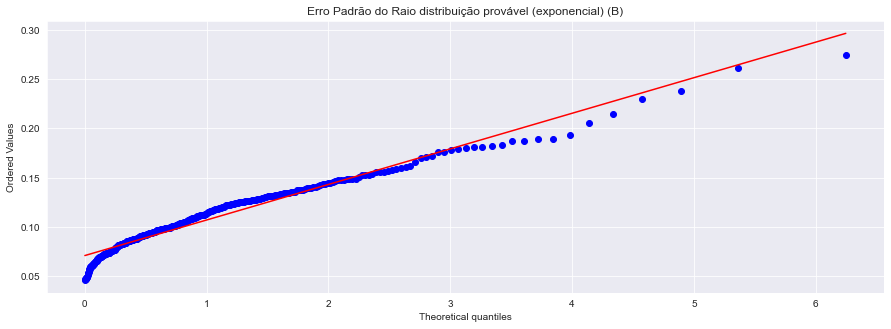

In [293]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'B'].radius_se), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Erro Padrão do Raio (B)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'B'].radius_se), hist = True , bins=20)
plt.title('Distruibuição do Erro Padrão do Raio - Distribuição teórica (B)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'B'].radius_se),dist='expon',plot=plt)
plt.title('Erro Padrão do Raio distribuição provável (exponencial) (B)')

plt.show()

#### Malignos

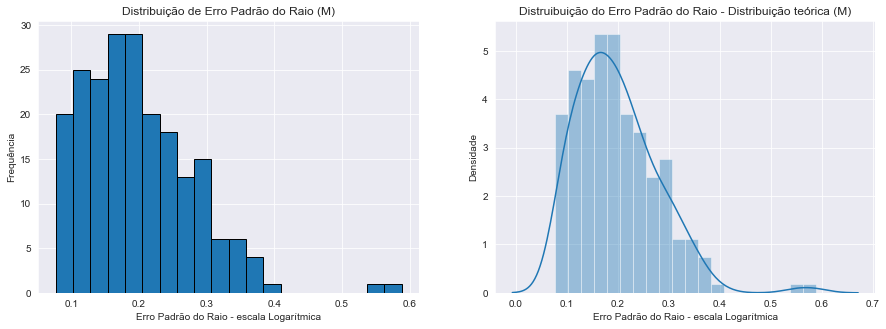

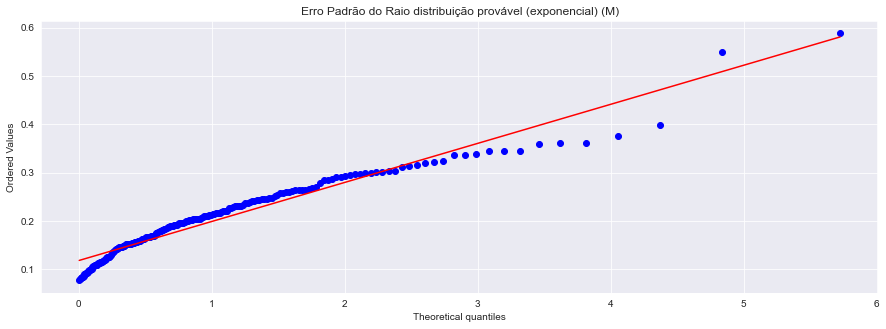

In [294]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'M'].radius_se), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Erro Padrão do Raio (M)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'M'].radius_se), hist = True , bins=20)
plt.title('Distruibuição do Erro Padrão do Raio - Distribuição teórica (M)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'M'].radius_se),dist='expon',plot=plt)
plt.title('Erro Padrão do Raio distribuição provável (exponencial) (M)')

plt.show()

## Pontos de concavidade (mean, worst e SE)
<div id='concavidade_pts'></div>

Vamos analisar detalhadamente os `pontos de concavidade` (`concave_points`) dos núcleos celulares dos tecidos. 

### Pontos de concavidade, médio (`concave points_mean`)

Vamos analisar um histograma que compara os pontos de concavidade médios dos núcleos celulares para os dois casos de diagnóstico (M e B):

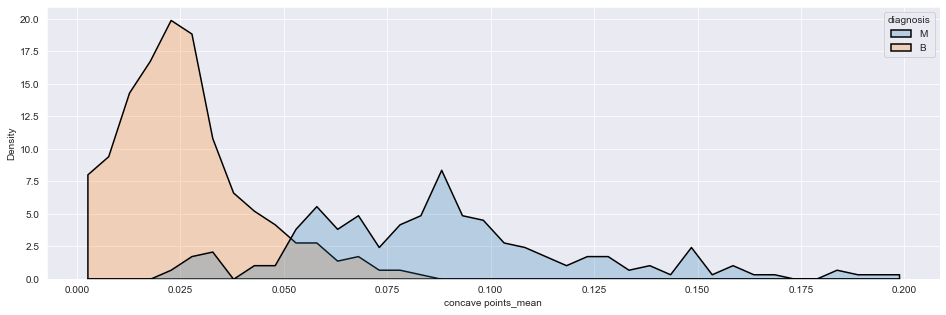

In [295]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="concave points_mean", hue="diagnosis", stat='density', element="poly",edgecolor="black",lw=1.5,bins=40,log_scale=False);

### Pontos de concavidade, worst (`concave points_worst`)

Vamos analisar um histograma que compara os pontos de concavidade médios dos núcleos celulares para os dois casos de diagnóstico (M e B):

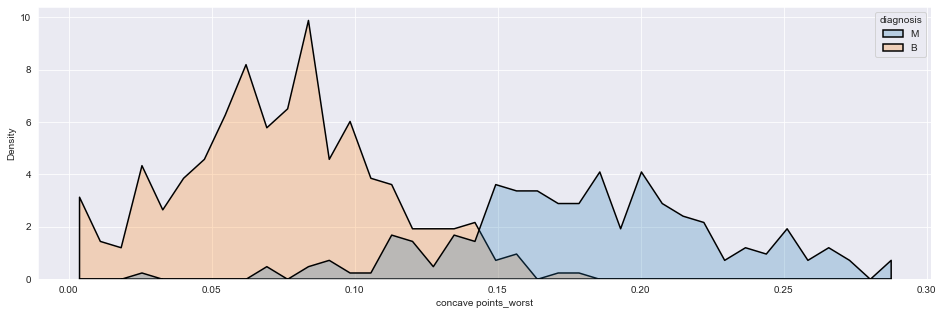

In [296]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="concave points_worst", hue="diagnosis", stat='density', element="poly",edgecolor="black",lw=1.5,bins=40,log_scale=False);

- **Note que nesse gráfico é possível ver uma separação entre valores de pontos de concavidade para Malignos e pontos de concavidade para benignos**. Além disso, é possível notar que a maior quantidade de pontos de concavidade se encontra para as celulas de câncer (maligno). Isso pode ser interpretado pela maior irregularidade das células de tumores malignos. 

### Benigno

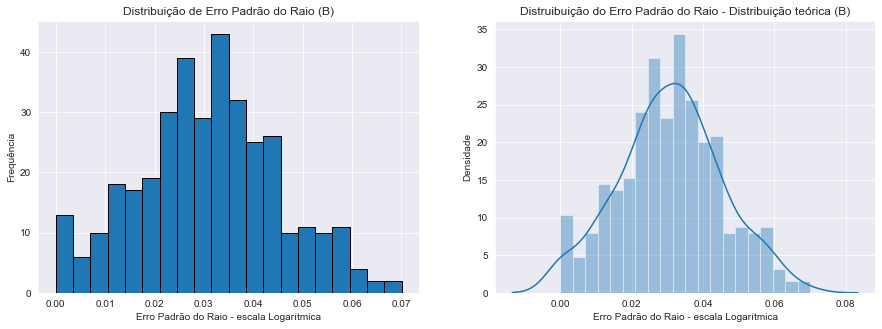

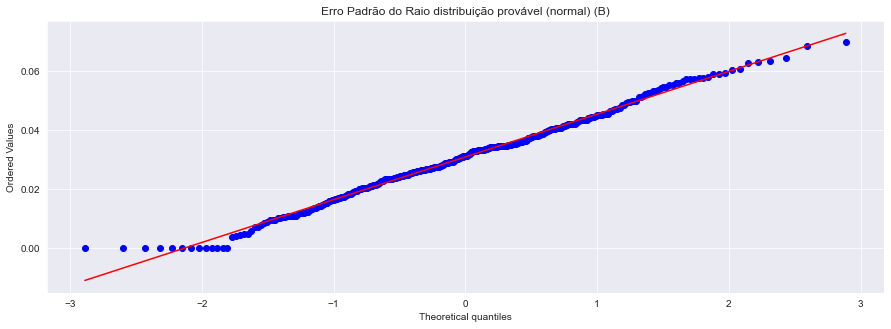

In [297]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'B']['concave points_worst']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Erro Padrão do Raio (B)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'B']['concave points_worst']), hist = True , bins=20)
plt.title('Distruibuição do Erro Padrão do Raio - Distribuição teórica (B)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'B']['concave points_worst']),dist='norm',plot=plt)
plt.title('Erro Padrão do Raio distribuição provável (normal) (B)')

plt.show()

### Maligno

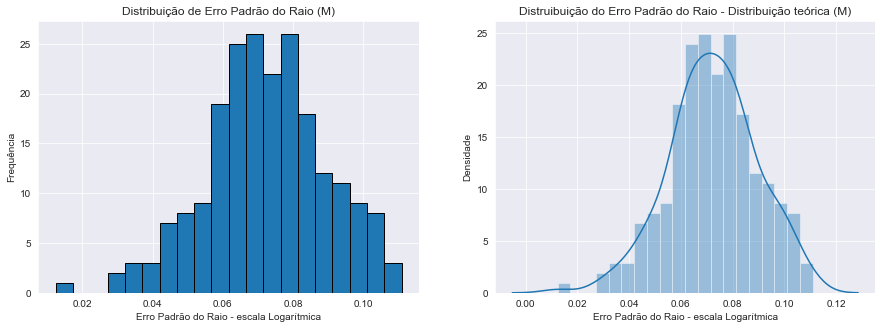

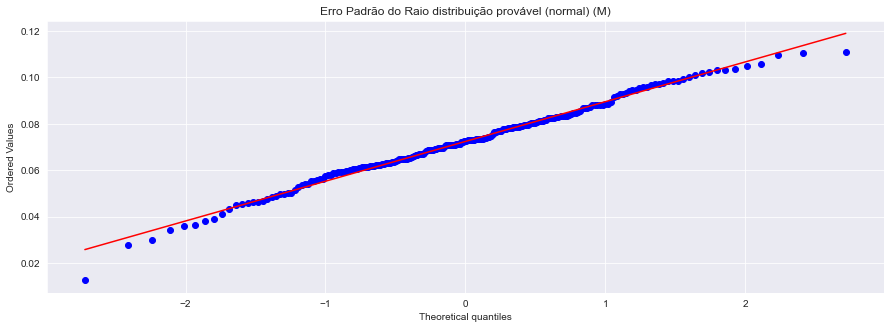

In [298]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'M']['concave points_worst']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Erro Padrão do Raio (M)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'M']['concave points_worst']), hist = True , bins=20)
plt.title('Distruibuição do Erro Padrão do Raio - Distribuição teórica (M)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'M']['concave points_worst']),dist='norm',plot=plt)
plt.title('Erro Padrão do Raio distribuição provável (normal) (M)')

plt.show()

### Pontos de concavidade, worst (`concave points_se`)

Vamos analisar um histograma que compara o erro padrão dos pontos de concavidade dos núcleos celulares para os dois casos de diagnóstico (M e B):

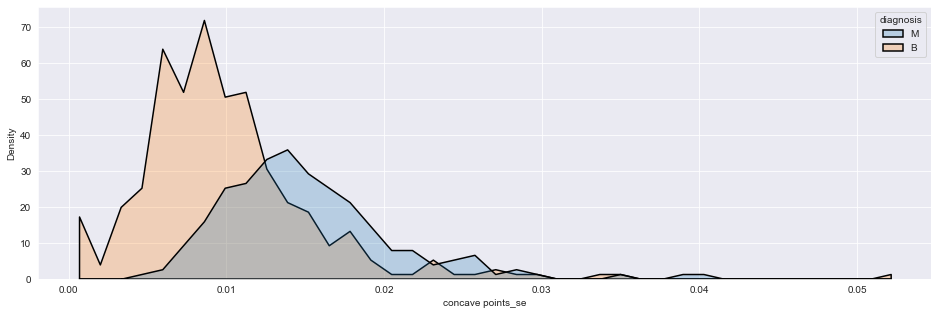

In [299]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="concave points_se", hue="diagnosis", stat='density', element="poly",edgecolor="black",lw=1.5,bins=40,log_scale=False);

### Benigno

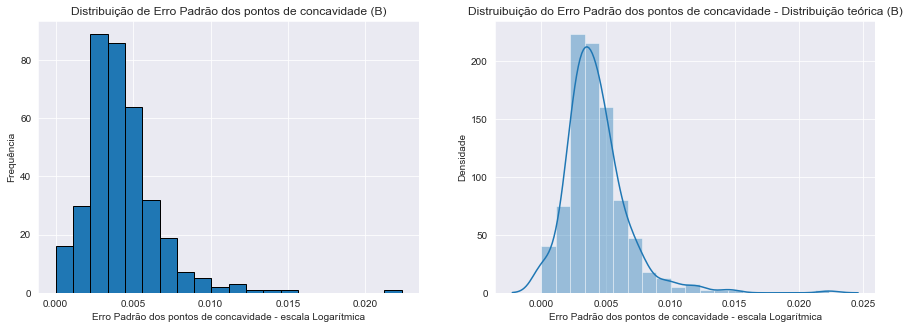

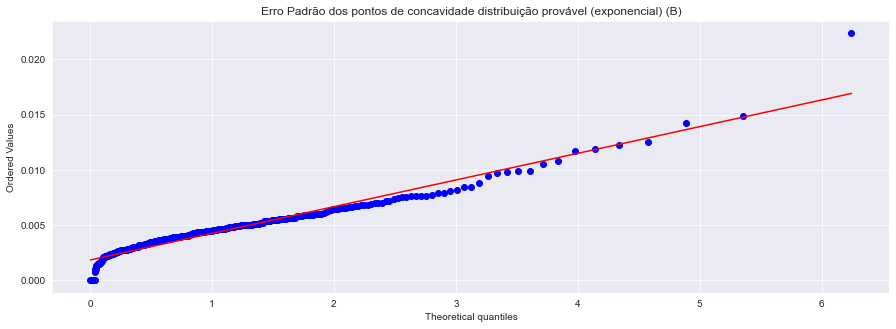

In [300]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'B']['concave points_se']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Erro Padrão dos pontos de concavidade (B)')
plt.xlabel('Erro Padrão dos pontos de concavidade - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'B']['concave points_se']), hist = True , bins=20)
plt.title('Distruibuição do Erro Padrão dos pontos de concavidade - Distribuição teórica (B)')
plt.xlabel('Erro Padrão dos pontos de concavidade - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'B']['concave points_se']),dist='expon',plot=plt)
plt.title('Erro Padrão dos pontos de concavidade distribuição provável (exponencial) (B)')

plt.show()

### Maligno

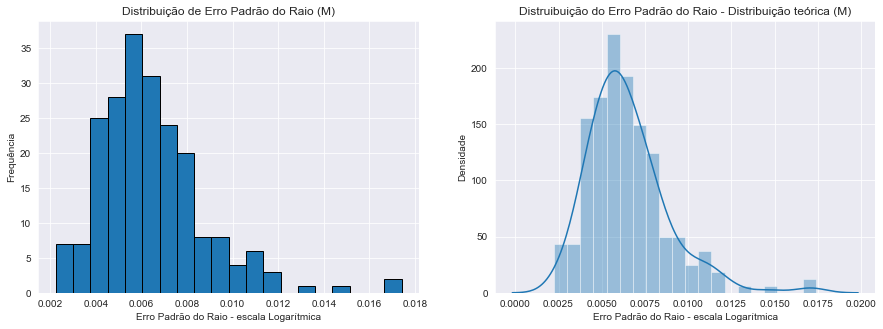

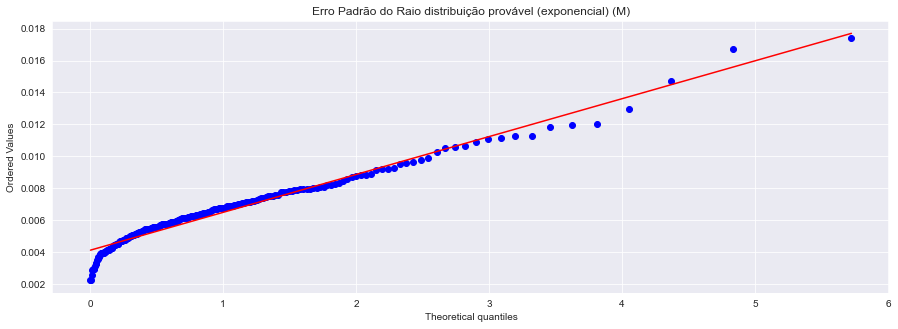

In [301]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'M']['concave points_se']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Erro Padrão do Raio (M)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'M']['concave points_se']), hist = True , bins=20)
plt.title('Distruibuição do Erro Padrão do Raio - Distribuição teórica (M)')
plt.xlabel('Erro Padrão do Raio - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'M']['concave points_se']),dist='expon',plot=plt)
plt.title('Erro Padrão do Raio distribuição provável (exponencial) (M)')

plt.show()

## Concavidade (mean, worst e SE)

<div id='concavidade'></div>
    
Vamos analisar agora a concavidade das células (`concavity`) para as duas classificações:

### Concavidade média (`concavity_mean`)
Vamos analisar um histograma que compara a concavidade média dos núcleos celulares para os dois casos de diagnóstico (M e B):

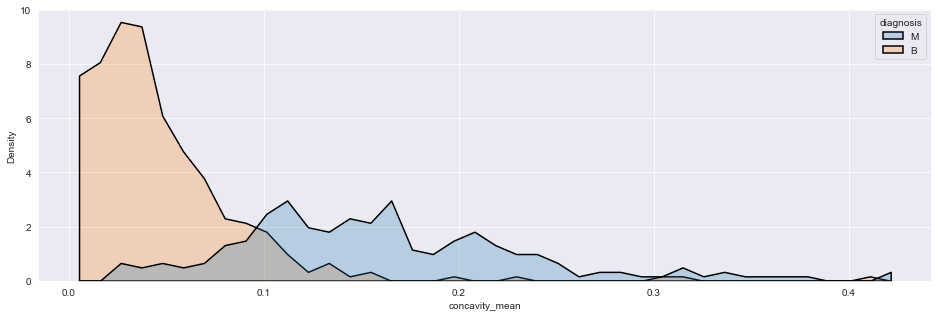

In [302]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="concavity_mean", hue="diagnosis", stat='density', element="poly",edgecolor="black",lw=1.5,bins=40,log_scale=False);

### Benigno

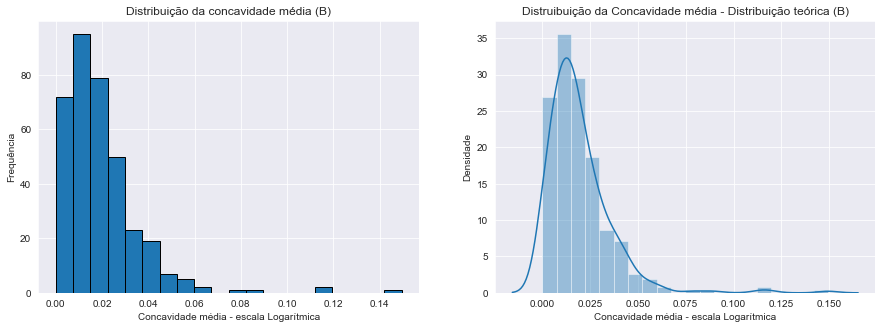

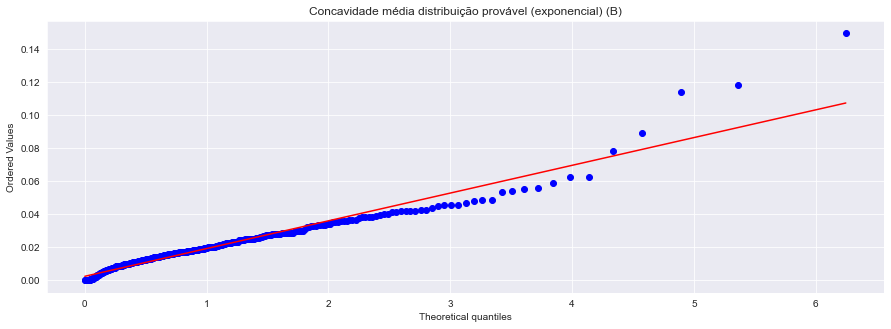

In [303]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'B']['concavity_mean']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição da concavidade média (B)')
plt.xlabel('Concavidade média - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'B']['concavity_mean']), hist = True , bins=20)
plt.title('Distruibuição da Concavidade média - Distribuição teórica (B)')
plt.xlabel('Concavidade média - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'B']['concavity_mean']),dist='expon',plot=plt)
plt.title('Concavidade média distribuição provável (exponencial) (B)')

plt.show()

### Maligno

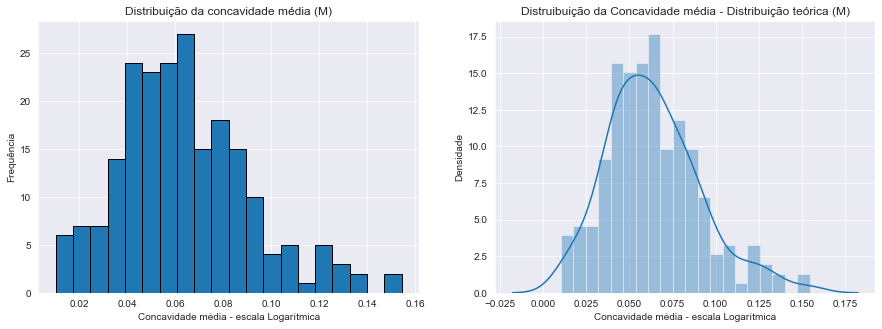

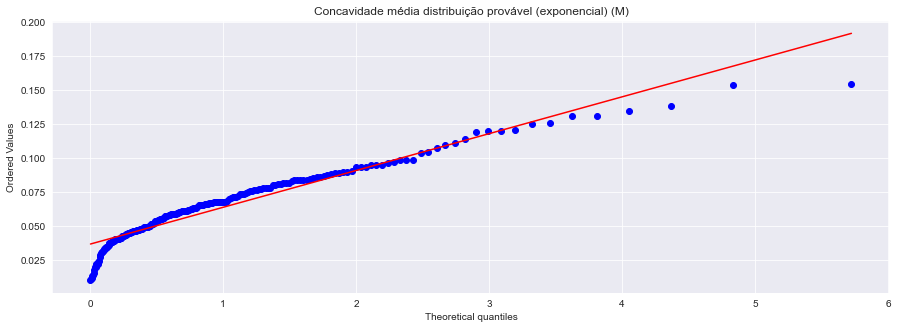

In [304]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'M']['concavity_mean']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição da concavidade média (M)')
plt.xlabel('Concavidade média - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'M']['concavity_mean']), hist = True , bins=20)
plt.title('Distruibuição da Concavidade média - Distribuição teórica (M)')
plt.xlabel('Concavidade média - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'M']['concavity_mean']),dist='expon',plot=plt)
plt.title('Concavidade média distribuição provável (exponencial) (M)')

plt.show()

### Concavidade pior (`concavity_worst`)
Vamos analisar um histograma que compara a concavidade média dos núcleos celulares para os dois casos de diagnóstico (M e B):

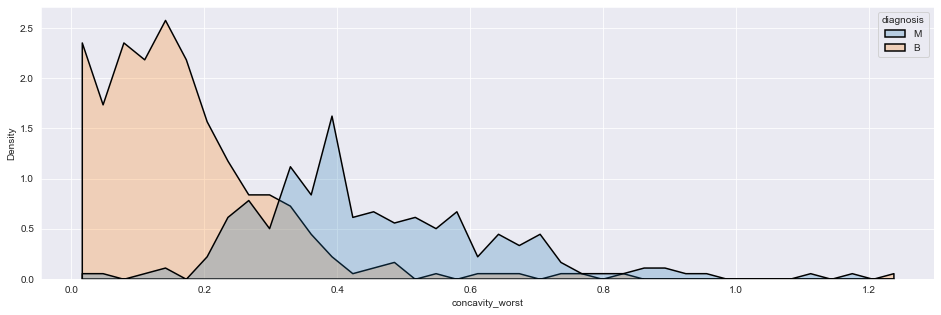

In [305]:
plt.figure(figsize=(16,5))
sb.histplot(data,x="concavity_worst", hue="diagnosis", stat='density', element="poly",edgecolor="black",lw=1.5,bins=40,log_scale=False);

### Benigno

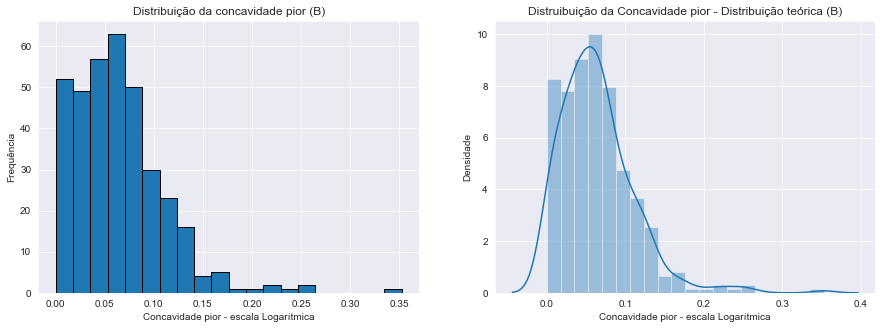

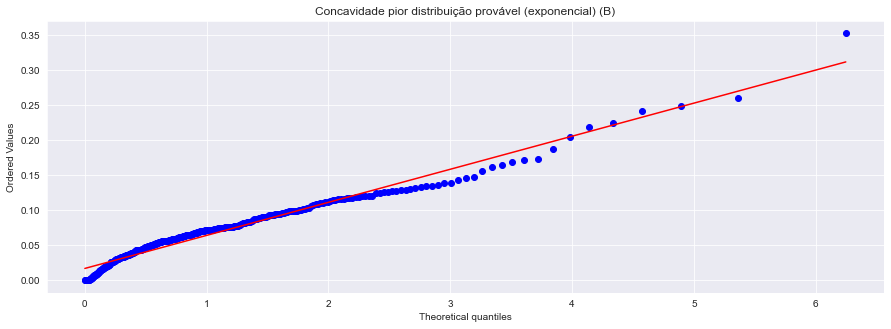

In [306]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'B']['concavity_worst']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição da concavidade pior (B)')
plt.xlabel('Concavidade pior - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'B']['concavity_worst']), hist = True , bins=20)
plt.title('Distruibuição da Concavidade pior - Distribuição teórica (B)')
plt.xlabel('Concavidade pior - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'B']['concavity_worst']),dist='expon',plot=plt)
plt.title('Concavidade pior distribuição provável (exponencial) (B)')

plt.show()

### Maligno

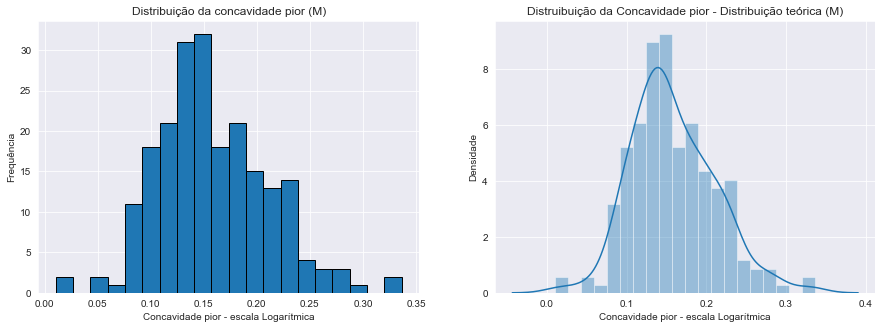

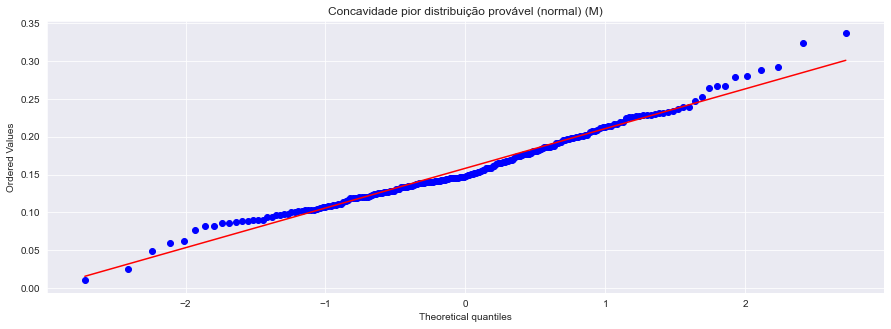

In [307]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(log_scale(data.loc[data.diagnosis == 'M']['concavity_worst']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Distribuição da concavidade pior (M)')
plt.xlabel('Concavidade pior - escala Logarítmica')
plt.ylabel('Frequência')

plt.subplot(122)
sb.distplot(log_scale(data.loc[data.diagnosis == 'M']['concavity_worst']), hist = True , bins=20)
plt.title('Distruibuição da Concavidade pior - Distribuição teórica (M)')
plt.xlabel('Concavidade pior - escala Logarítmica')
plt.ylabel('Densidade')

plt.show()

plt.figure(figsize=(15,5))
stats.probplot(log_scale(data.loc[data.diagnosis == 'M']['concavity_worst']),dist='norm',plot=plt)
plt.title('Concavidade pior distribuição provável (normal) (M)')

plt.show()

- **Note que para a mesma feature, porém com diagnósticos diferentes, as distribuições mais prováveis não são iguais.** Para tumores benignos, a distribuição mais provável para a pior concavidade segue uma exponencial, já para tumores malignos (cancerosos), a distribuição mais provável para a pior concavidade segue uma normal. 


- **Isso pode ter implicações bastante interessantes.** Do ponto de vista do cálculo de probabilidades condicionais, a distribuição será diferente para ambos os casos, portanto, a maneira de calcular também será diferente. Isso é um fator sutil que precisa ser levado em conta nos cálculos. A utilização do modelo errado pode acarretar em erros de cálculos, promovendo previsões erradas.

## Relação entre as features
Para entender como uma feature influencia na outra, vamos avaliar os gráficos de dispersão das variáveis mais importantes.

### Relação entre Área, Perímetro e Raio
Para o início do estudo, vamos avaliar a relaçã oda Área do perímeiro e do raio. Essa relação, em específico, é possível prever pelo simples fato de que elas estão naturalmente relacionadas pela sua natureza matemática. Isso se deve ao fato de que elas foram calculadas como visto no item [Como calcular as features](#extracao_de_features), e de que a geometria das células impoem que tal fato ocorra.

- **Previsão 1**: É de se esperar que ao plotar raio x área, o gráfico se assemelhe com um gráfico quadrático

- **Previsão 2**: É de se esperar que ao plotar raio x perimetro, o gráfico se assemelhe com um gráfico linear crescente

- **Previsão 3**: É de se esperar que ao plotar perimetro x área, o gráfico se assemelhe com um gráfico quadrático


#### Valores médios (mean)

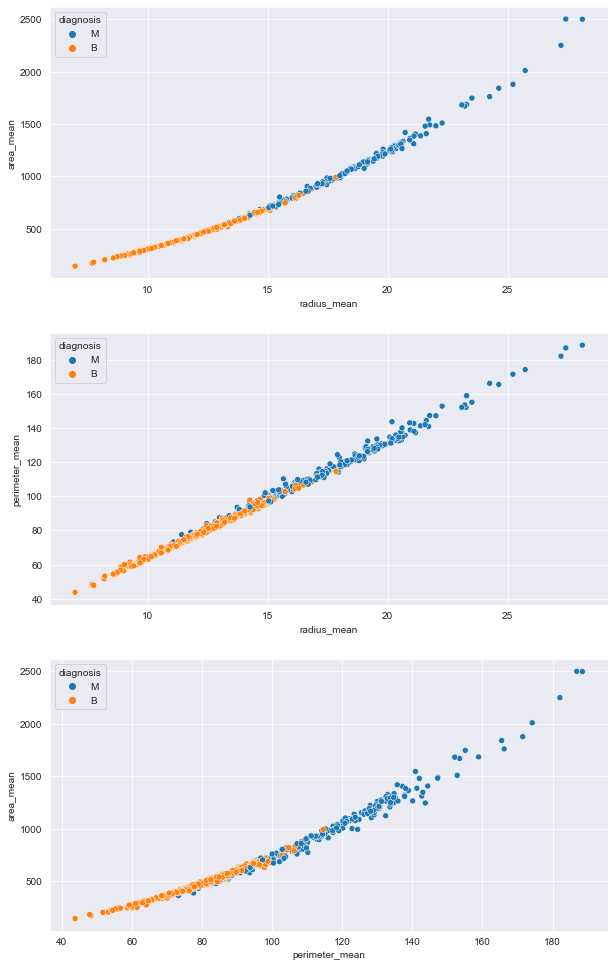

In [308]:
fig,ax=plt.subplots(3, figsize=(10,17))
sb.scatterplot(x='radius_mean',y='area_mean',data=data,hue='diagnosis',ax=ax[0])
sb.scatterplot(x='radius_mean',y='perimeter_mean',data=data,hue='diagnosis',ax=ax[1])
sb.scatterplot(x='perimeter_mean',y='area_mean',data=data,hue='diagnosis',ax=ax[2])
plt.show()

### Mapa de calor das variáveis

Um mapa de calor é uma ferramenta de análise de dados de nos mostra a correlação numérica entre variáveis. Isso pode ser visualizado em uma matriz, simbolizada tanto em valores de 0 a 1, quanto em uma escala de cores.

No nosso caso, como havíamos comentado, o mapa de calor vai nos mostrar uma correlação máxima entre as features anteriores. Isso se deve, sobretudo, às explicações anteriores do motivo geométrico e matemático dessa variáveis estarem fortemente relacionadas.

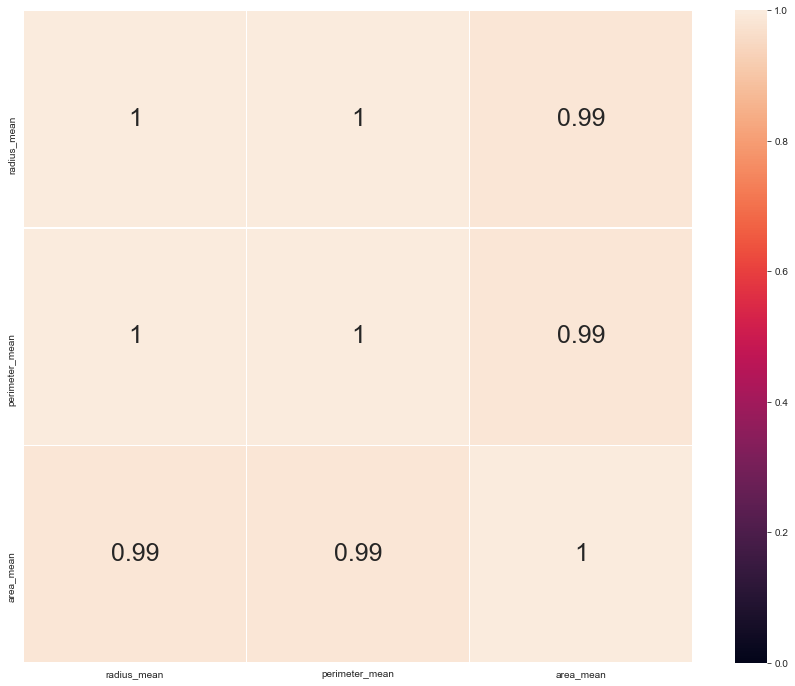

In [309]:
fig, ax = plt.subplots(figsize=(15,12)) 
sb.heatmap(data[['radius_mean','perimeter_mean', 'area_mean']].corr(),ax=ax,annot=True,linewidth=0.5, vmax=1, vmin= 0,annot_kws={"fontsize":25});

Pelos gráficos acima, é possível visualizar que o que foi previsto realmente pode ser evidenciado. Portanto, vamos seguir adiante.

## Relação entre Concavidade, Pontos de Concavidade e Compacidade

É de se esperar que a Concavidade esteja relacionada com os Pontos de concavidade devido às imposições geométricas da células. Porém, vamos analisar como funciona essa análise para os gráficos de compacidade.

### Relação `mean`

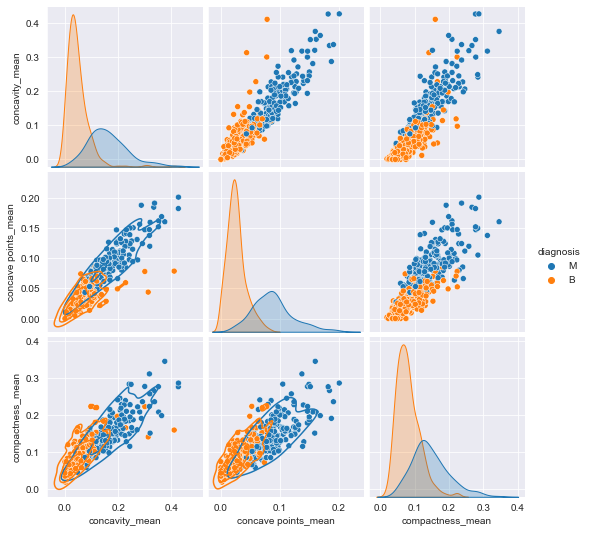

In [310]:
mean_values = ['diagnosis', 'concavity_mean',  'concave points_mean', 'compactness_mean']
g = sb.pairplot(data[mean_values], hue='diagnosis', diag_kind='kde')
g.map_lower(sb.kdeplot, levels=4, color=".4")

- **Pelo gráfico anterior, é possível visualizar a relação que prevíamos. Além disso, note que, pelo contorno que está evidenciado pela matriz de scatter, é possível ver que existe uma certa separabilidade entre as classes benigno e maligno.** Portanto, é possível ver que essa feature pode ser crucial de ser utilziada pelos nossos modelos para estabelecer uma classificação preditiva.

#### Mapa de calor 

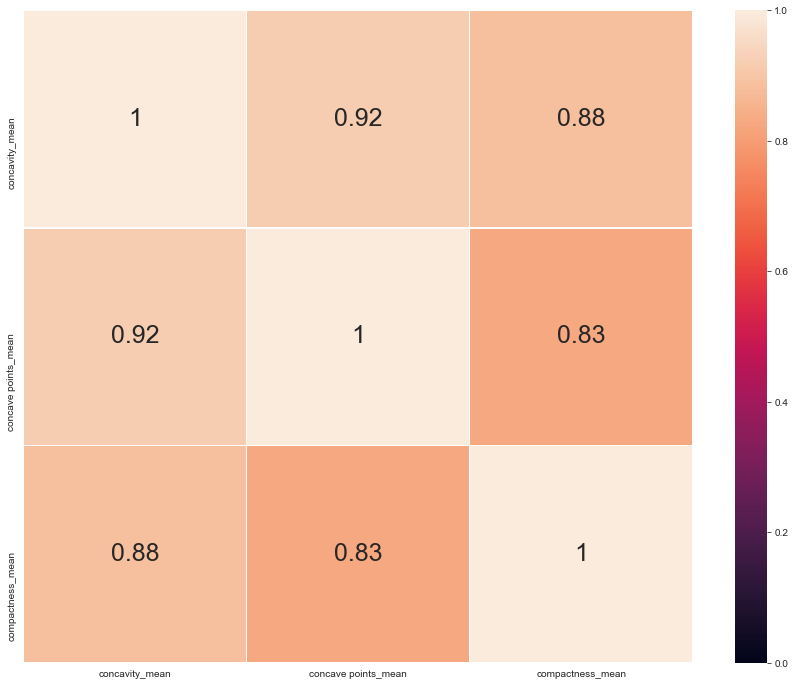

In [311]:
fig, ax = plt.subplots(figsize=(15,12)) 
sb.heatmap(data[mean_values].corr(),ax=ax,annot=True,linewidth=0.5, vmax=1, vmin= 0,annot_kws={"fontsize":25});

### Relação ` worst`

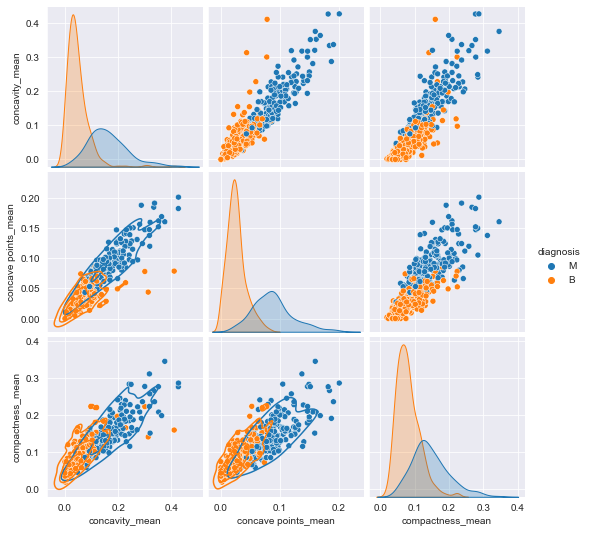

In [312]:
worst_values = ['diagnosis', 'concavity_worst',  'concave points_worst', 'compactness_worst']
g = sb.pairplot(data[mean_values], hue='diagnosis', diag_kind='kde')
g.map_lower(sb.kdeplot, levels=4, color=".4")

- **Pelo gráfico anterior, é possível visualizar a relação que prevíamos. Além disso, note que, pelo contorno que está evidenciado pela matriz de scatter, é possível ver que existe uma certa separabilidade entre as classes benigno e maligno.** Portanto, é possível ver que essa feature pode ser crucial de ser utilziada pelos nossos modelos para estabelecer uma classificação preditiva. É possivel ver também que o grau de alinhamento para a categoria worst é menor do que a categoria mean.

#### Mapa de calor

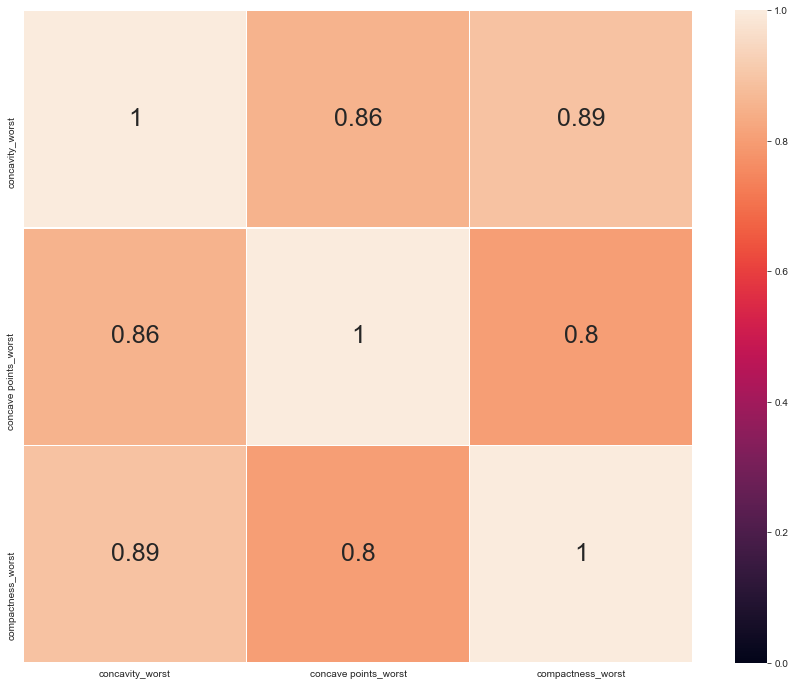

In [313]:
fig, ax = plt.subplots(figsize=(15,12)) 
sb.heatmap(data[worst_values].corr(),ax=ax,annot=True,linewidth=0.5, vmax=1, vmin= 0,annot_kws={"fontsize":25});

## Relação entre todas as features `mean`

Nesse tópico, vamos plotar um gráfico que mostra a disperção entre todos os valores `mean`, combinados dois a dois. Essa avaliação é muito importante pelo fato de nos dar uma visão global do compartamento de cada variável em relação às outras.

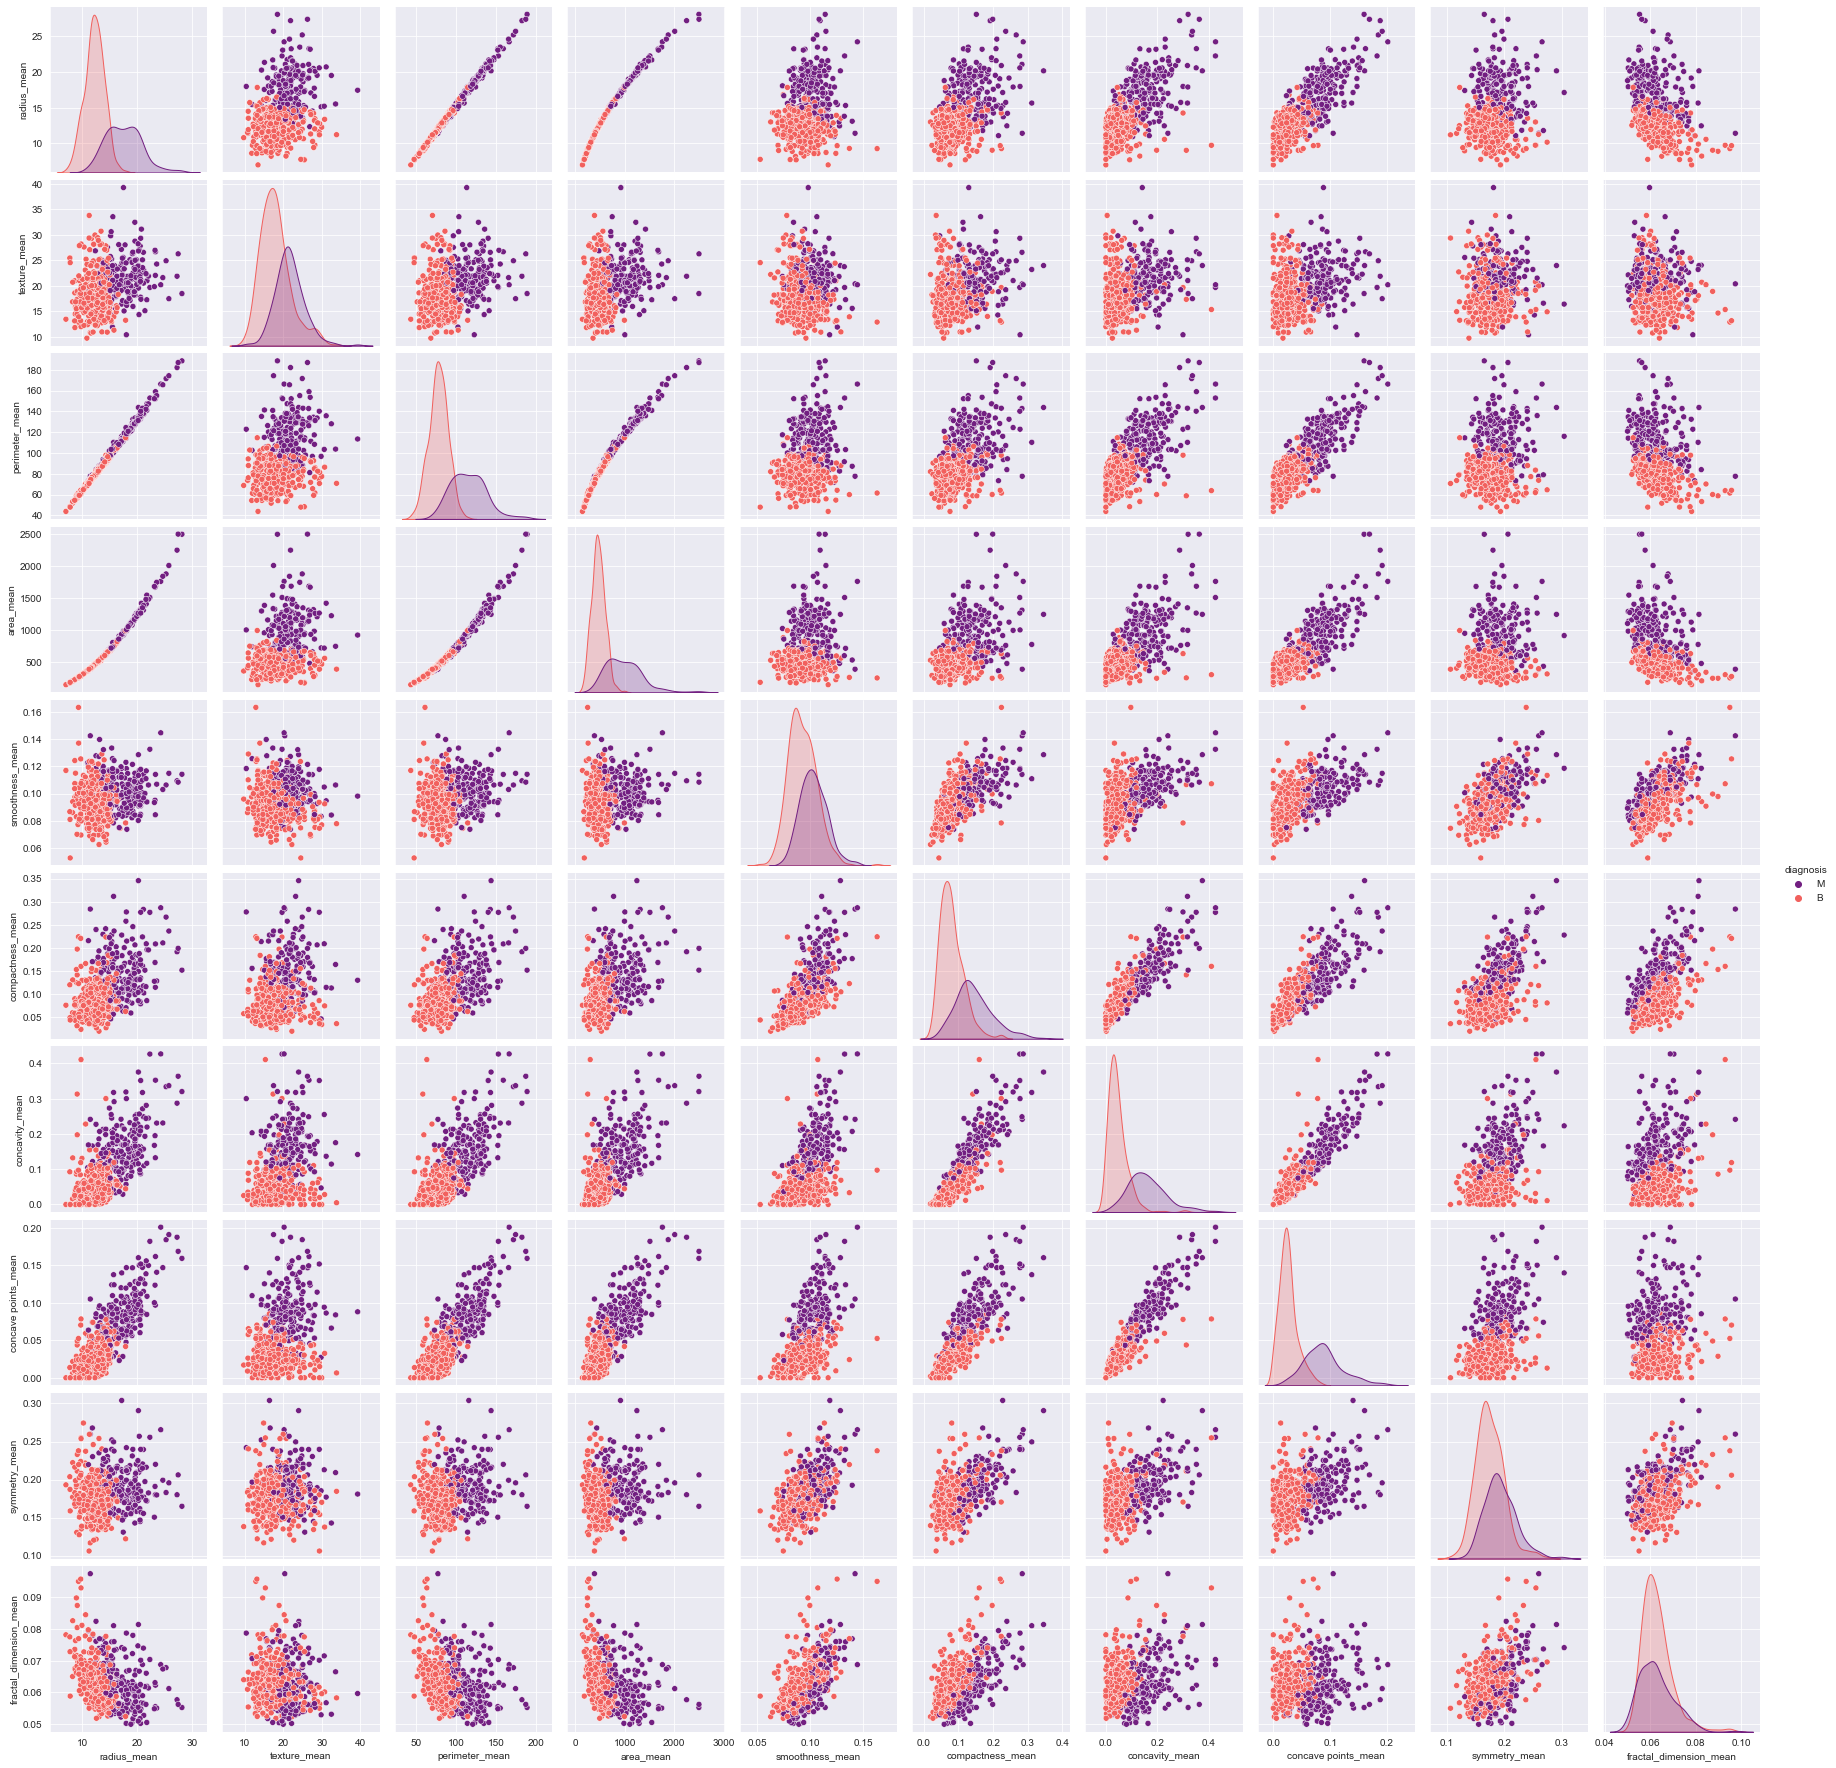

In [314]:
mean_values = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sb.pairplot(data[mean_values],hue = 'diagnosis', palette='magma');

### Mapa de calor para todas as features `mean`

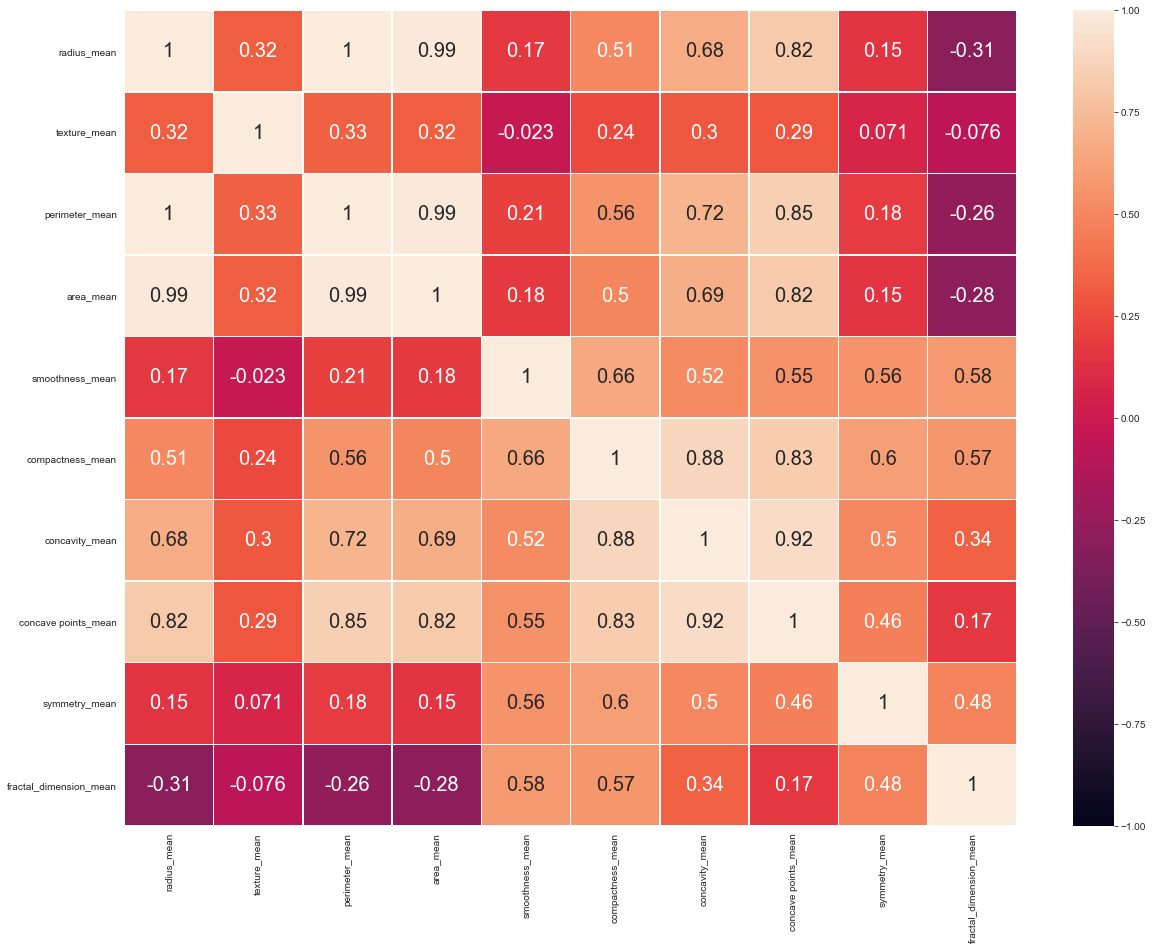

In [315]:
fig, ax = plt.subplots(figsize=(20,15)) 
sb.heatmap(data[mean_values].corr(),ax=ax,annot=True,linewidth=.5 ,annot_kws={"fontsize":20}, vmin=-1, vmax=1);

## Relação entre todas as features `worst`

Nesse tópico, vamos plotar um gráfico que mostra a disperção entre todos os valores `worst`, combinados dois a dois. Essa avaliação é muito importante pelo fato de nos dar uma visão global do compartamento de cada variável em relação às outras.

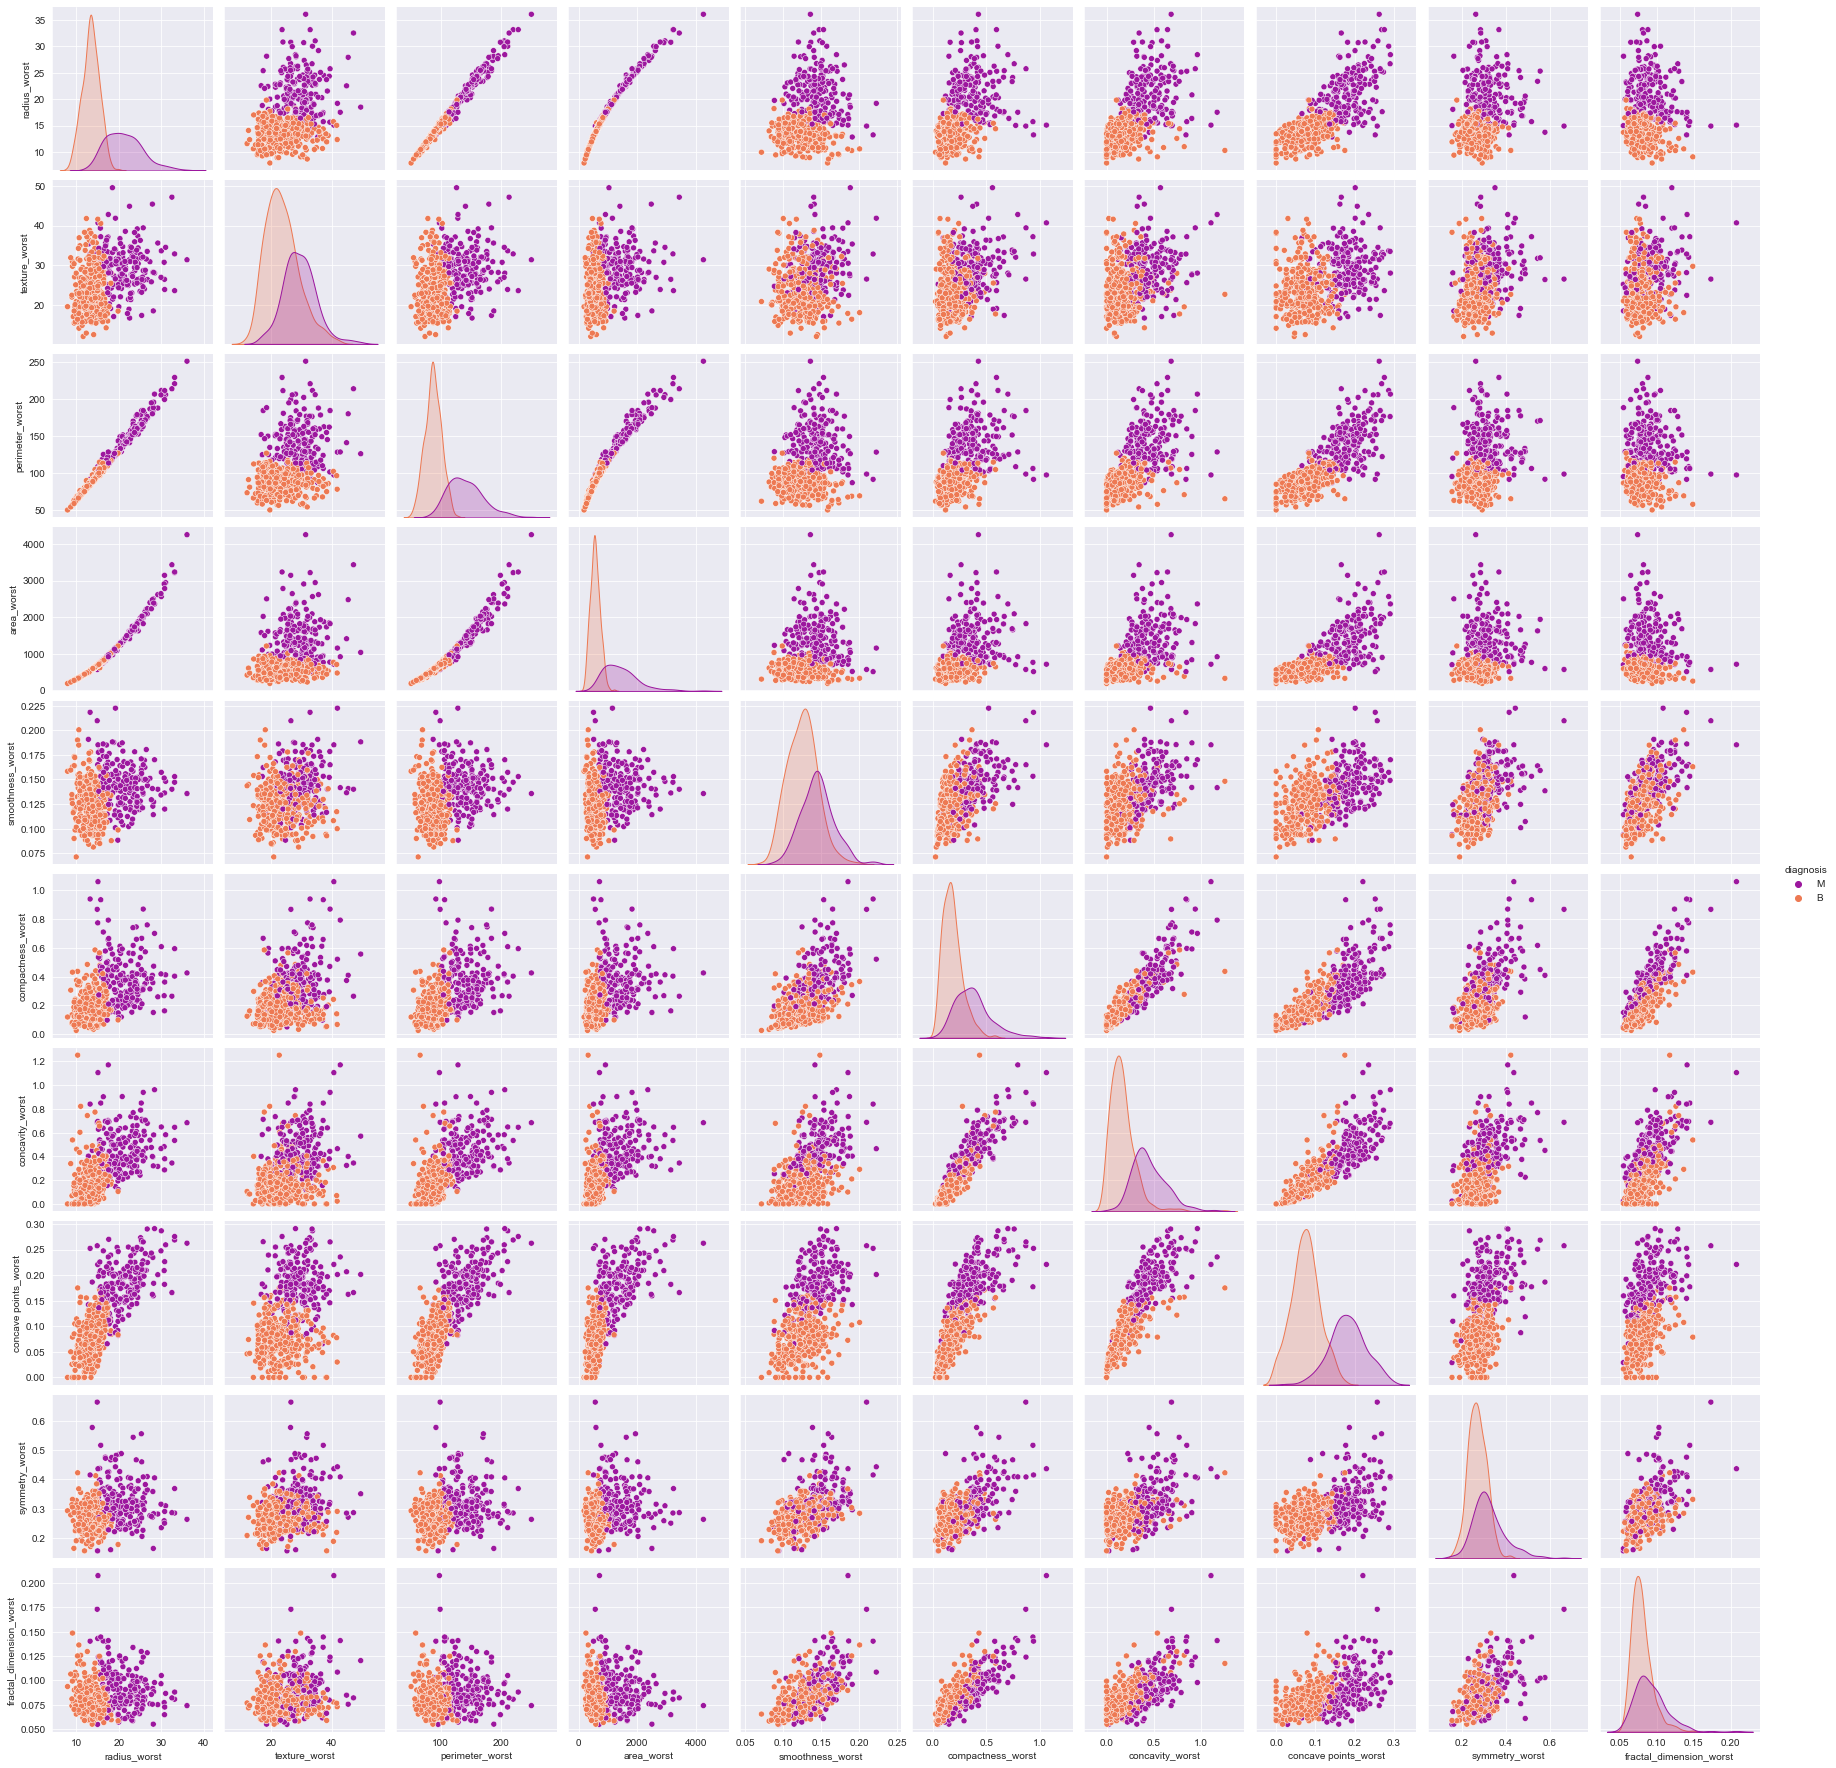

In [316]:
worst_values = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

sb.pairplot(data[worst_values],hue = 'diagnosis', palette="plasma");

### Mapa de calor para todas as features `worst`

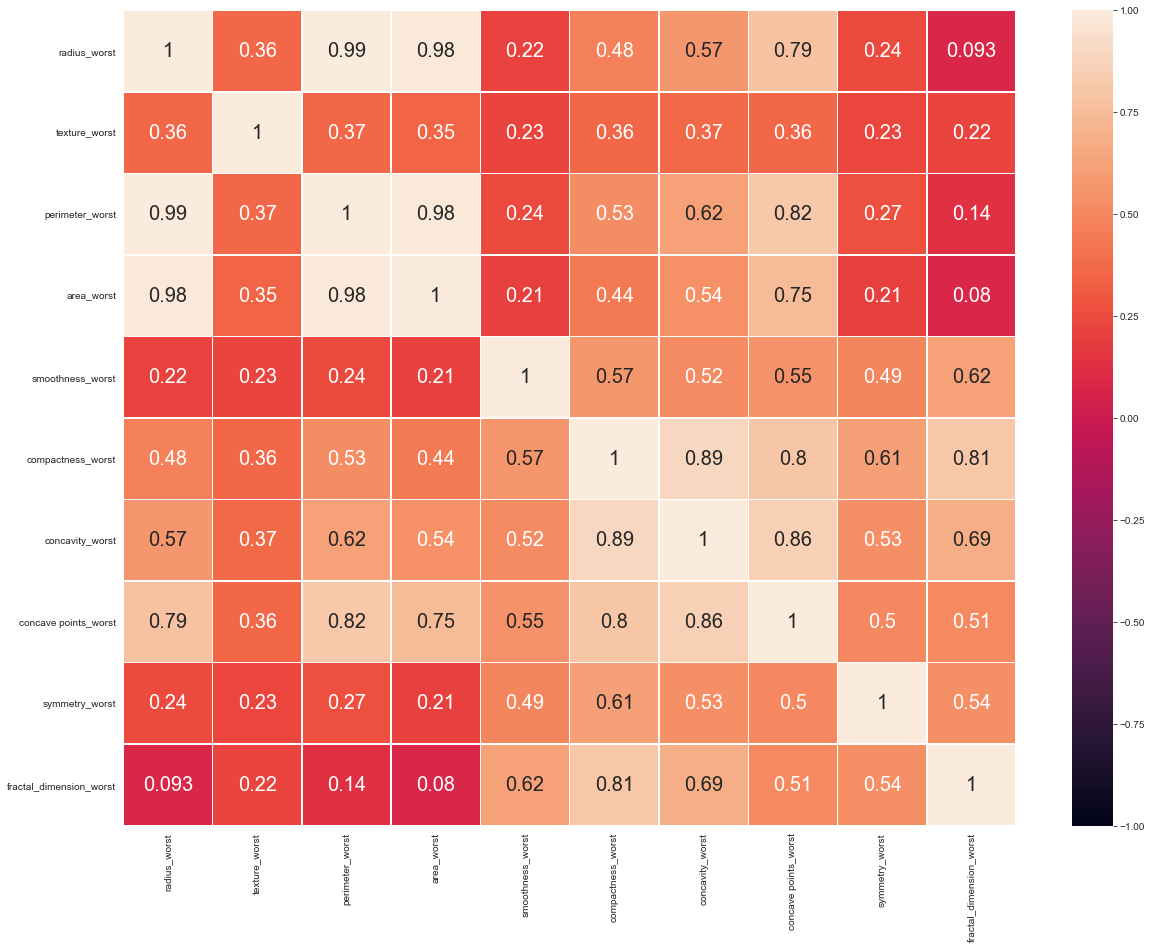

In [317]:
fig, ax = plt.subplots(figsize=(20,15)) 
sb.heatmap(data[worst_values].corr(),ax=ax,annot=True,linewidth=.5 ,annot_kws={"fontsize":20}, vmin=-1, vmax=1);

## Criando um Mapa de Calor de todas as features

Para finalizar a análise do ponto de vista da correlação, vamos criar um mapa de calor de todas as features. Isso vai nos permitir ter uma visibilidade global das nossas variáveis, após as análise individuais de pontos importantes. 

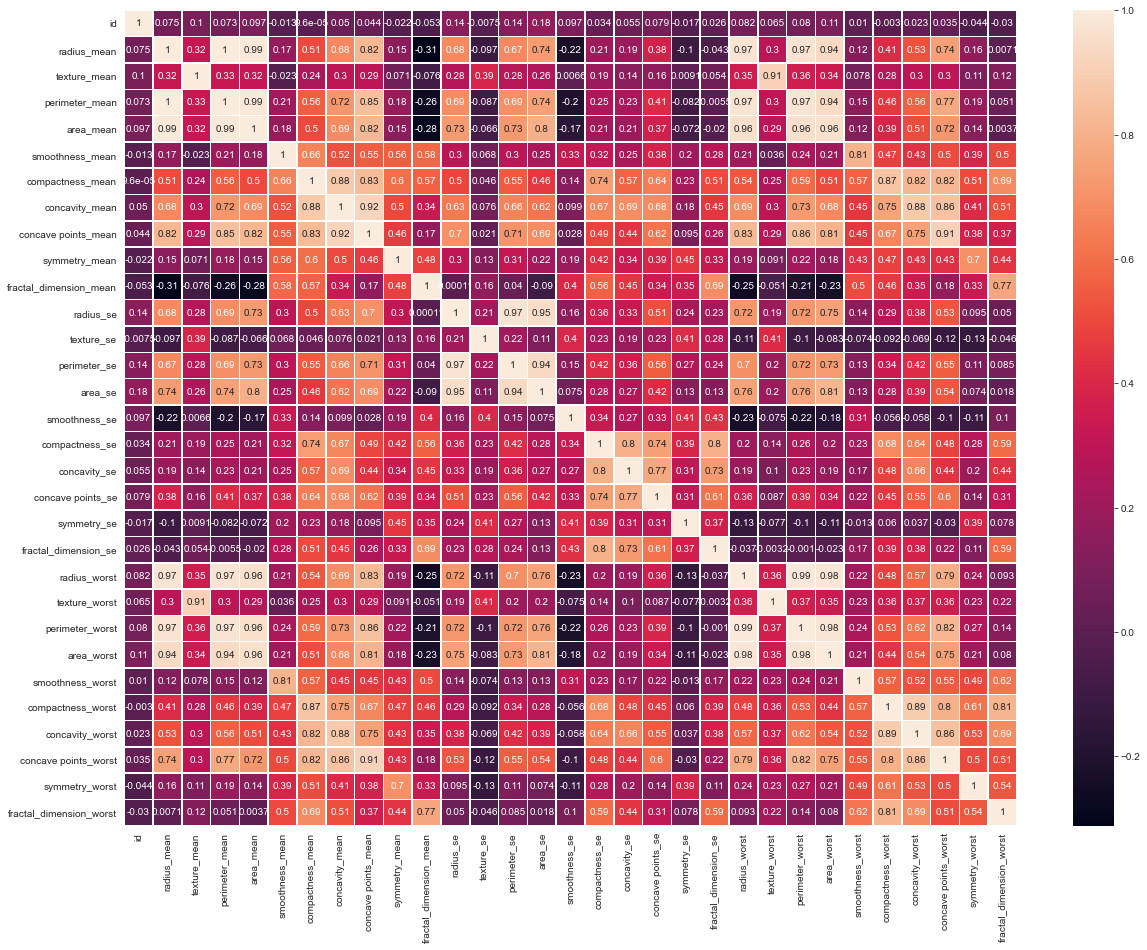

In [318]:
fig, ax = plt.subplots(figsize=(20,15)) 
sb.heatmap(data.corr(),ax=ax,annot=True,linewidth=.5);

# Finalizando análise exploratória
<div id='finalizando'></div>

Após toda a análise exploratória feita até aqui, é possível termos propriedade para tratar das variáveis que dizem respeito o data set. Para tanto, vamos concatenar os pontos principais que exploramos e que vai nos dar maior propriedade para contruções futuras.
 
1) **Fizemos a devida limpeza da base de dados**: Para iniciar a análise exploratória, é necessário que a base de dados esteja devidamente tratada, isto é, que conste valores que podem ser de fato computados para gerar resultados.

2) **Relevância das características das células**: É possível visualizar quais são as características mais relevantes das células através do uso da SelectKbest. A biblioteca que atribuiu score para cada feature, calculado em quanto ela pode influenciar no nosso target.

- **Features mais relevantes**: `perimeter_mean`, `radius_worst`, `concave points_mean`, `perimeter_worst`, `concave points_worst`.

- **Features menos relevantes**: `symmetry_se`, `texture_se`, `fractal_dimension_mean`, `smoothness_se`, `fractal_dimension_se`.

3) **Histogramas de benignidade e malignidade**: Após repetir um processo de análise utilizando histogramas, é possível notar que para valores de raio (médio, pior e erro padrão), concavidade (médio, pior e erro padrão) e pontos de concavidade (médio, pior e erro padrão) existe uma certa separação entre a contagem dos valores atingidos por cada um. **Tumores malignos, em geral, atingem maior raio, maior grau de concavidade e maior numero de pontos de concavidade**.

4) **Análise de distribuição teórica**: Com o passo anterior feito para gráficos com a frequência relativa, fizemos uma análise geral do ponto de vista da distribuição que as features pode assumir. O resultado foi que majoritariamente as distribuições se aproximam de uma distribuição exponencial (essa análise foi feita utilizando o `probplot`), com exceção da análise da pior concavidade (`concavity_worst`). Para a mesma feature, porém com diagnósticos diferentes, as distribuições mais prováveis não são iguais, Para o diagnóstico benigno (**B**), a distribuição mais provável segue uma exponencial, para o diagnóstico maligno (**M**), a distribuição mais provável segue uma normal. Isso tem sérias implicações, haja vista o fato de que se fizermos um modelo para tentar representar os diagnósticos, é preciso levar em conta, **do ponto de vista de probabilidades condicionais**, que os modelos podem ser diferentes, levando à cálculos distintos.




# Conclusão

Por fim, com a utilização dos fatos que exploramos até aqui, é possível concluir nosso primeiro objetivo:

> **1) Entender o perfil e as características das células de tecidos com tumores benignos e malignos.**

É possível visualizar os perfis de maneira separada. Como característica geral, as células de um tecido com tumor maligno (cancer) se mostram, no geral, mais irregulares do que as células de um tecido com tumor benigno. A utilização das features pode ser direcionada para o seguinte intuito: **Buscar irregularidades**.

Sem dúvida, o aspecto que mais deve ser vislumbrado é a irregularidade de células com tumor maligno. A manipulação dos dados para que nosso modelo indique as maiores irregularidades pode ser uma excelente estratégia para entender melhor e predizer a classificação de um determinado paciente. 

-----------------

### Criando conjunto de treino e de teste (train, test, split)

Antes de iniciarmos a seção de Machine Learning, vamos criar um conjunto de treinamento e de teste. Mais adiante, a necessidade desse recurso se fará mais clara.

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=111)

In [320]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
280        19.16         26.60          126.20     1138.0          0.10200   
454        12.62         17.15           80.62      492.9          0.08583   
295        13.77         13.27           88.06      582.7          0.09198   
262        17.29         22.13          114.40      947.8          0.08999   
202        23.29         26.67          158.90     1685.0          0.11410   
..           ...           ...             ...        ...              ...   
7          13.71         20.83           90.20      577.9          0.11890   
118        15.78         22.91          105.70      782.6          0.11550   
322        12.86         13.32           82.82      504.8          0.11340   
275        11.89         17.36           76.20      435.6          0.12250   
86         14.48         21.46           94.25      648.2          0.09444   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
280           0.14530         0.19210              0.09664         0.1902   
454           0.05430         0.02966              0.02272         0.1799   
295           0.06221         0.01063              0.01917         0.1592   
262           0.12730         0.09697              0.07507         0.2108   
202           0.20840         0.35230              0.16200         0.2200   
..                ...             ...                  ...            ...   
7             0.16450         0.09366              0.05985         0.2196   
118           0.17520         0.21330              0.09479         0.2096   
322           0.08834         0.03800              0.03400         0.1543   
275           0.07210         0.05929              0.07404         0.2015   
86            0.09947         0.12040              0.04938         0.2075   

     radius_se  ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
280     0.6361  ...         23.72          35.90           159.80      1724.0   
454     0.1692  ...         14.34          22.15            91.62       633.5   
295     0.2191  ...         14.67          16.93            94.17       661.1   
262     0.8348  ...         20.39          27.24           137.90      1295.0   
202     0.5539  ...         25.12          32.68           177.00      1986.0   
..         ...  ...           ...            ...              ...         ...   
7       0.5835  ...         17.06          28.14           110.60       897.0   
118     0.5520  ...         20.19          30.50           130.30      1272.0   
322     0.2212  ...         14.04          21.08            92.80       599.5   
275     0.6412  ...         12.40          18.99            79.46       472.4   
86      0.4204  ...         16.21          29.25           108.40       808.9   

     smoothness_worst  compactness_worst  concavity_worst  \
280            0.1782            0.38410          0.57540   
454            0.1225            0.15170          0.18870   
295            0.1170            0.10720          0.03732   
262            0.1134            0.28670          0.22980   
202            0.1536            0.41670          0.78920   
..                ...                ...              ...   
7              0.1654            0.36820          0.26780   
118            0.1855            0.49250          0.73560   
322            0.1547            0.22310          0.17910   
275            0.1359            0.08368          0.07153   
86             0.1306            0.19760          0.33490   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
280               0.18720          0.3258                  0.09720  
454               0.09851          0.3270                  0.07330  
295               0.05802          0.2823                  0.06794  
262               0.15280          0.3067                  0.07484  
202               0.27330          0.3198                  0.08762  
..                    .

-----------------------

# Introdução ao Machine Learning
<div id= "ml"></div>

De maneira sucinta e direta, podemos definir Machine Learning com as palavras de [Arthur Samuel, 1959](https://pt.wikipedia.org/wiki/Arthur_Samuel):

> **"Machine Learning é o campo que dá aos computadores a capacidade aprender a realizar determinada tarefa, sem ser explicitamente programado para isso."**

De forma usual, um grande exemplo de que o aprendizado de máquina é bastante útil, é na criação de um filtro de spam. Tradicionalmente, se você fosse construir um algoritmo, seria necessário você implementar regras de escrita explicitamente. E-mails que possuem escritas informais como “Vc”, “4U”... são fortes candidatos a se tornarem sinalizadores de que existe algo errado. 

Note que, variações como “For U”, ou “ce” precisam ser implementadas também como novas regras de avaliação. Nesse ponto, se spammers continuarem variando escritas como essa, será necessário que você permaneça constantemente escrevendo novas regras.
Em contrapartida, um filtro baseado em técnicas de Machine Learning permite que a máquina aprenda padrões frequentes de exemplos de spams. Nesse sentido, a disponibilização de um montante de dados é crucial para que, a partir deles, o sistema julgue uma nova instância (Inclusive, utilizando essa nova instância para fazer um update dos dados sem sua intervenção). 

Além disso, as técnicas de Machine Learning podem ajudar as pessoas a descobrirem padrões ou tendências, em um grande número de dados, que antes não estavam imediatamente aparentes, isso se chama de Data Mining (ou mineração de dados).

Alguns termos técnicos são cruciais para o melhor entendimento desses tipos de algoritmos:

* `features`: São as colunas, valores ou atributos que dão característica a valor que pretende ser previsto. (No nosso caso, o raio, a textura, a compacidade, a suavidade... dos dados que já analisamos)


* `target`: A coluna, valor ou variável que desejamos prever. (No nosso caso, o diagnóstico)


* `Conjunto de treino (training set)` : Uma fração do conjunto todal de dados, particionado com o objetivo de ensinar o sistema a tomar decisões com base nos dados existentes nesse cojunto.


* `Conjunto de teste (test set)` : A fração complementar do conjunto anterior. Serve para testar e avaliar (com métricas adequadas) o modelo ou sistema que foi treinado com os dados do conjunto de treinamento.


* `Hiperparâmetros `: São os parâmetros de funcionamento de cada modelo. Cada um tem sua particularidade e complexidade de funcionamento.


Algorítimos de decisão:


* `Algorítimo de regressão` : consiste em prever um dataset com target numérico quantitativo.


* `Algorítimo de classificação` : consiste em prever um dataset com target qualitativo.

## Tipo de algoritmo que utilizaremos

Para prosseguirmos, é necessário identificar que tipo algoritmo utilizaremos. Tendo em vista que nosso `target` é qualitativo (B ou M), faremos uma **tarefa de classificação**. Portanto, é necessário explorar as técnicas e métricas adequadas para avaliar tal tipo de algoritmo.

## Métricas
<div id= "metricas"></div>

Como comentado anteriormente, vamos explorar cada métrica que será utilizada no presente projeto.

### Accuracy (score)

É a métrica mais simples de todas, representa a porcentagem total de acertos em relação ao conjunto inteiro.

$$Accuracy = \frac{TN+TP}{TN+TP+FP+FN}$$

Essa métrica é bastante útil, porém em casos de largos conjuntos de dados cujas porcentagens das classificações são muito diferentes, essa métrica pode ser falha. Para tanto, se faz necessário a utilização de outros tipos de métricas.

### Recall ou "Revocação" (True positive rate ou taxa de verdadeiros positivos)

A definição matemática é bastante simples. Recall expressa para nós a taxa das instâncias que foram classificadas corretamente como postivos em relação a todas as instâncias positivas, isto é, taxa de verdadeiros positivos. É calculado da seguinte forma:

$$Recall = \frac{TP}{TP+FN}$$

Pode ser interpretado da seguinte forma: "Das instâncias positivas, quantas foram classificadas corretamente?".

### Precision ou "Precisão" 

É bastante intuitiva e normalmente é analisada em conjunto com o recall (revocação). É calculada da seguinte forma:

$$Precision = \frac{TP}{TP+FP}$$

Pode ser interpretada como a fração de instâncias positivas classificadas corretamente dividido pelo total de positivos preditos.

### F1 Score

É uma extensão das métricas anteriores. É possível chegar nela fazendo a média harmônica das métricas anteriores:


$$F1 = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}}$$


$$F1 = \frac{2}{\frac{TP + FN}{TP} + \frac{TP + FP}{TP}}$$


$$F1 = \frac{TP}{TP + \frac{FN + FP}{2}}$$

Em alguns casos, somente a pontuação de F1 é suficiente para avaliar um modelo, porém é válido ressaltar que, devido a média harmônica, será favorecido o valor menor. Portanto, para incrementar o valor de F1 ao máximo, é preciso ter a precisão e a revocação equilibradas (ou até equivalentes). 


### Trade-off de precisão e revocação

É comum ouvir as pessoas que querem desenvolver um projeto de ML quererem atingir o máximo de precisão. Porém, é preciso se atentar para o fato de que existe um equilíbro entre precisão e revocação. Para diferentes projetos, teremos diferentes necessidades. É comum que os modelos preditivos tenham uma função de score dentro de sua complexidade, para atribuir pontuação às instâncias e daí decidir a classificação a partir de um limiar. Dessa forma, a alteração desse limiar afeta diretamente a precisão e a revocação. Acompanhe o gráfico:

<img src="assets/trade_off_p_r.jpeg" style="float: center;padding:1rem;">

Portanto, não é razoável discutir que queremos o máximo de precisão sem levar em conta a revocação. Para questões práticas, imagine que queremos um sistema que detecte roubos: É viável um sistema com altíssima revocação, pois com certeza ele iria classificar com baixa incidência de falsos negativos. Os guardas seriam acometidos com um grande número de alarmes falsos (falsos positivos), mas praticamente todos os ladrões serão pegos.


### Matriz de confusão

A matriz de confusão é uma ferramenta imprescindível na análise de desempenho de um classificador. Isso se deve, sobretudo, ao fato da maior praticidade e visibilidade dos valores presentes na matriz. São quatro possibilidades para cada instância classificada:
 
- `Verdadeiro Positivo` ou `True Positive`: São as instâncias classificadas **corretamente** como **positiva**.

- `Falso Positivo` ou `False Positive`: São as instâncias classificadas **erroneamente** como **positiva**.

- `Verdeiro Negativo` ou `True Negative`: São as instâncias classificadas **corretamente** como **negativa**.

- `Falso Negativo` ou `False Negative`: São as instâncias classificadas **erroneamente** como **negativa**.

Para tanto, a simplicidade da matriz de confusão torna ela uma excelente ferramenta. Acompanhe:

<img src="assets/matriz_de_confusao.png" style="float: center;padding:1rem;">

- `Na diagonal principal`, temos os valores corretamente classificados.

- `Na diagonal secundária`, temos os valores erroneamente classificados.

### ROC Curve (Curva de característica de operações)

A curva ROC é outra ferramenta comum usada com classificadores binários. Ela plota a taxa de verdadeiros positivos (recall) vs. taxa de falsos positivos. Em outras palavras, a curva ROC representa a sensibilidade (revocação) vs. a especificidade (taxa de falsos positivos). Para exemploficar melhor, acompanhe o gráfico:

<img src="assets/roc_curve.png" style="float: center;padding:2rem;">

Note que quando a área sobre a curva for 1, significa que o classificador é perfeito. Quando a área é 0.5, nos encontramos num classificador aleatório por natureza. Em outras palavras, quanto mais a curva se afastar da diagonal do classificador aleatório, melhor será o classificador.

### Método K-fold de validação cruzada (Sklearn)

Uma forma de avaliar o modelo de decisão é utilizar o método K-fold de validação cruzada. A técnica consiste em dividir aleatoriamente o conjunto de treinamento em K conjuntos distintos chamados Folds, depois treina e avalia o modelo K vezes, escolhendo sempre um fold diferente para avaliação e treinamento dos outros K - 1. Utilizando a biblioteca Sklearn, o resultado será um array com K valores de avaliação do modelo.

<img src="assets/kfold.png" style="float: center;padding:2rem;">

# Início da construção dos modelos
<div id='intro_modelos'></div>

Vamos agora construir os modelos preditivos para que consigamos prever nosso target a partir de um conjunto de dados. Para tanto, utilizaremos a biblioteca `sklearn` (já víamos usando bastante ao decorrer do projeto). Antes de iniciarmos a construção dos modelos, vamos relembrar o nosso objetivo 2:

> **2) O objetivo deste trabalho é utilizar técnicas de ML para modelar e prever a classificação do diagnótico de pacientes: tumor benigno, ou tumor maligno (Câncer).**

## Random Forest (Floresta aleatória)
<div id='rf_clf'></div>

De maneira simples, o modelo de floresta aleatória cria várias árvores de decisão (de forma aleatória) e as combina de tal forma que gere o melhor resultado das suas predições, ou seja, com maior acurácia. Apesar de estarmos utilizando a floresta aleatória em uma tarefa de classificação, ela pode também ser utilizada em tarefas de regressão (quando o target é quantitativo e não qualitativo). As florestas aleatórias, aplicadas para classificação, são um dos pilares do ML, é muito versátil e muito poderoso. Acompanhe um exemplo de figura que mostra uma floresta aleatória: 
<img src="assets/rf.png" style="float: center;padding:2rem;">

Ao fazer as partições de seus nós, o modelo procura as melhores características em subconjuntos aleatórios dentro da floresta. O modelo Random Forest é um modelo ensemble, é resultado da união de outros modelos. Nesse contexto, a floresta aleatória é construida a partir da combinação paralela de várias árvores de decisão e normalmente treinada por um modelo "bagging". Falando em 

In [368]:
# Importa a biblioteca que contém o modelo (sklearn)
from sklearn.ensemble import RandomForestClassifier

# cria objeto RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200)

# Treina o modelo utilizando a base de treinamento
rf_clf.fit(X_train, y_train)

# Realiza predições com a base de teste
y_pred_rf = rf_clf.predict(X_test)

# Calcula scores para base de teste
print(f'A acurácia para o modelo foi {accuracy_score(y_pred_rf, y_test) * 100:.2f}')

A acurácia para o modelo foi 98.25


### Método K-Fold de validação cruzada
Vamos utilizar o método K-fold para diferente métricas e avaliar seus respectivos scores:

In [410]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
for metrica in scoring_metrics:
    # Método K-fold de validação cruzada
    print('-------------Validação Cruzada para o conjunto completo-------------')
    print('')
    print(f'--------------------Métrica usada: {metrica}--------------------')
    lista_de_acuracia_treino = cross_val_score(rf_clf, X, y, cv=4, scoring=metrica)
    df_acuracia_treino = pd.DataFrame(lista_de_acuracia_treino)
    media_kfold_treino = df_acuracia_treino[0].mean()
    std_kfold_treino = df_acuracia_treino[0].std()
    print(f"Resultados obtidos a partir do método K-fold: {lista_de_acuracia_treino}")
    print(f"A média dos scores: {media_kfold_treino}")
    print(f"O desvio padrão dos scores: {std_kfold_treino}")
    print('')

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: accuracy--------------------
Resultados obtidos a partir do método K-fold: [0.94405594 0.97183099 0.97887324 0.97887324]
A média dos scores: 0.9684083522111693
O desvio padrão dos scores: 0.016570877402996752

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: f1_micro--------------------
Resultados obtidos a partir do método K-fold: [0.94405594 0.96478873 0.97183099 0.97183099]
A média dos scores: 0.963126662070324
O desvio padrão dos scores: 0.013140082071651512

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: f1_macro--------------------
Resultados obtidos a partir do método K-fold: [0.92505241 0.9771496  0.97750673 0.97750673]
A média dos scores: 0.9643038688919321
O desvio padrão dos scores: 0.026168180218833215

-------------Validação Cruzada para o conjunto completo-

Legenda:
 0 - Benigno 
 1 - Maligno

Métricas: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.96      1.00      0.98        44

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion matrix: 
[[68  2]
 [ 0 44]]

Training Score: 100.00 %
Test Score: 98.25 %


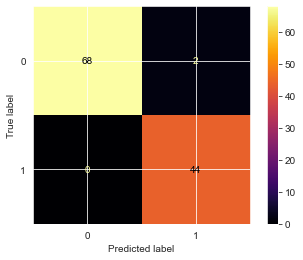

In [370]:
y_pred_rf = rf_clf.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score

print('Legenda:\n 0 - Benigno \n 1 - Maligno\n')
print('Métricas: ')
print(classification_report(y_test, y_pred_rf))
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred_rf)}\n')
print(f"Training Score: {rf_clf.score(X_train, y_train) * 100:.2f} %")
print(f"Test Score: {rf_clf.score(X_test, y_test) * 100:.2f} %")
plot_confusion_matrix(rf_clf, X_test, y_test, cmap='inferno');
plt.show()

#### 

### ROC Curve (Curva de Característica de Operação)

In [412]:
# Utiliza o método predict_proba para construir uma lista de scores para a RandomForest
y_probas_forest = cross_val_predict(rf_clf, X_test, y_test, cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:, 1]

# fpr - false positive rate
# tpr - true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_scores_forest)

In [413]:
# Cria função para fazer a ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylabel('True Positive Rate (Recall)')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

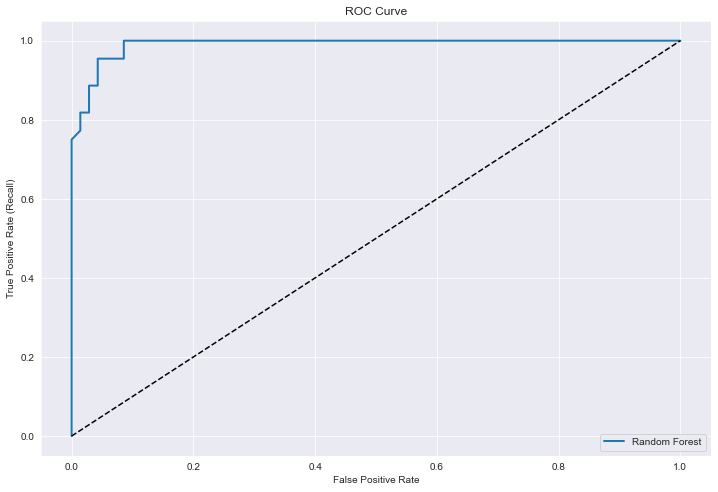

In [414]:
# Plota ROC curve
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr, 'Random Forest')
plt.legend()
plt.show()

# Gradiente descendente estocástico
O **gradiente descendente** é um algoritmo de otimização genérico que consegue identificar ótimas soluções para muitos problemas. A ideia geral do gradiente escendente é ajustar iterativamente os parâmetros com o intuito de minimizar uma função de custo. Seu funcionamento se baseia em selecionar uma instância aleatória no conjunto de treinamento a cada e calcula os gradientes com base apenas nessa instância única. Obviamente, trabalhar com uma instância de cada vez torna o algoritmo bem mais rápido, pois ele tem poucos dados para manipular a cada iteração. Isso facilita também o treinamento em conjuntos muito grandes de treinamento, uma vez somente uma instância precisa estar na memória a cada iteração (o GD estocástico pode ser implementado como um algoritmo out-of-core).

Em contrapartida, devido à natureza estocástica (ou seja, aleatório), esse algoritmo se mostra um tanto irregular, em vez de ir descendo suavemente até atingir o mínimo (seu principio de funcionamento, que leva em conta o funcionamento do do Gradiente Descendente), a função de custo irá subir e descer, descendo somenta na média. Com o tempo, a finalização atinge um ponto muito próximo do mínimo, e quando chegar lá, continuará oscilando (mesmo que pouco). Acompanhe a figura:

<img src="assets/sgd.jpeg" style="float: center;padding:2rem;">

Quando a função de custo é muito irregular, isso pode ajudar o modelo a não ficar preso em mínimos locais, isto é, a natureza irregular da função de custo pode promover maior acertividade (ou conferir maior chance) na busca pelo mínimo global. Nesse contexto, a função de custo irregular é boa por não deixar que o modelo ficar em mínimos locais ideais, porém não é boa em fazer o modelo estabilizar num mínimo global. 

Para implementar o gradiente descendente, é necessário calcular o gradiente da função de custo em relação a cada parâmetro do modelo $\theta_j$, em outras palavras, é necessário calcular o quanto mudará a função de custo caso você modifique um pouco $\theta_j$, ou seja, é necessário calcular a derivada parcial. Portanto vamos calcular para a função de custo $MSE(\theta)$:

$$\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{n}(\theta^{T}\cdot x^{(i)} - y^{(i)})x_{j}^{(i)} $$

Se escrevermos de forma matricial, podemos chegas no seguinte:
$$\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^{T}(X\theta - y)$$

O vetor gradiente contém todos valores das derivadas parciais, uma para cada parâmetro do modelo. Na prática, o que utilizamos é $\nabla_{\theta}MSE(\theta)$, por conter todos os valores para os parâmetros que precisamos aplicar o GD. 

Para contexto de aplicação, para fazermos o modelo funcionar, utilizaremos a seguinte equação:

$$\theta_{t+1} = \theta_{t} - \alpha \cdot \nabla_{\theta}MSE(\theta)$$

Onde $\theta_{t+1}$ é a próxima etapa de treinamento, $\theta_{t}$ é a etapa anterior e $\alpha$ é a taxa de aprendizado. 

In [423]:
# Importa a biblioteca que contém o modelo (sklearn)
from sklearn.linear_model import SGDClassifier

# cria objeto SGDClassifier
sgd_clf = SGDClassifier(random_state=45)

# Treina o modelo utilizando a base de treinamento
sgd_clf.fit(X_train, y_train)

# Realiza predições com a base de teste
y_pred_sgd = sgd_clf.predict(X_test)

# Calcula scores para base de teste
print(f'A acurácia para o modelo foi {accuracy_score(y_pred_sgd, y_test) * 100:.2f}')

A acurácia para o modelo foi 91.23


In [415]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
for metrica in scoring_metrics:
    # Método K-fold de validação cruzada
    print('-------------Validação Cruzada para o conjunto completo-------------')
    print('')
    print(f'--------------------Métrica usada: {metrica}--------------------')
    lista_de_acuracia_treino = cross_val_score(sgd_clf, X, y, cv=6, scoring=metrica)
    df_acuracia_treino = pd.DataFrame(lista_de_acuracia_treino)
    media_kfold_treino = df_acuracia_treino[0].mean()
    std_kfold_treino = df_acuracia_treino[0].std()
    print(f"Resultados obtidos a partir do método K-fold: {lista_de_acuracia_treino}")
    print(f"A média dos scores: {media_kfold_treino}")
    print(f"O desvio padrão dos scores: {std_kfold_treino}")
    print('')

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: accuracy--------------------
Resultados obtidos a partir do método K-fold: [0.91578947 0.89473684 0.93684211 0.91578947 0.86315789 0.85106383]
A média dos scores: 0.8962299365434864
O desvio padrão dos scores: 0.03331806031032677

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: f1_micro--------------------
Resultados obtidos a partir do método K-fold: [0.91578947 0.89473684 0.93684211 0.91578947 0.86315789 0.85106383]
A média dos scores: 0.8962299365434863
O desvio padrão dos scores: 0.03331806031032678

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: f1_macro--------------------
Resultados obtidos a partir do método K-fold: [0.90838959 0.88219246 0.92931548 0.90423387 0.85806229 0.8219697 ]
A média dos scores: 0.8840272302463866
O desvio padrão dos scores: 0.03893979904

Legenda:
 0 - Benigno 
 1 - Maligno

Métricas: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        70
           1       0.93      0.84      0.88        44

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

Confusion matrix: 
[[67  3]
 [ 7 37]]

Training Score: 92.09 %
Test Score: 91.23 %


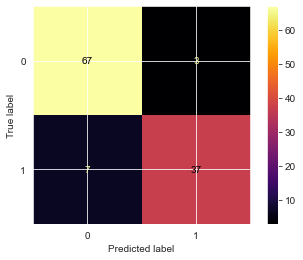

In [419]:
y_pred_sgd = sgd_clf.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score

print('Legenda:\n 0 - Benigno \n 1 - Maligno\n')
print('Métricas: ')
print(classification_report(y_test, y_pred_sgd))
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred_sgd)}\n')
print(f"Training Score: {sgd_clf.score(X_train, y_train) * 100:.2f} %")
print(f"Test Score: {sgd_clf.score(X_test, y_test) * 100:.2f} %")
plot_confusion_matrix(sgd_clf, X_test, y_test, cmap='inferno');
plt.show()

### Trade-off precisão/revocação

Como havia sido discutido, existe um trade-off entre a precisão e a revocação. Nesse sentido, vamos visualizar o comportamento complementar das duas métricas.

In [420]:
y_scores_sgd = cross_val_predict(sgd_clf, X_test, y_test, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_sgd)

In [421]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.figure(figsize=(12, 8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precisions')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recalls')
    plt.title("Precisão (Precision) e Revocação (Recall) vs. Limiar de decisão (Threshold)")

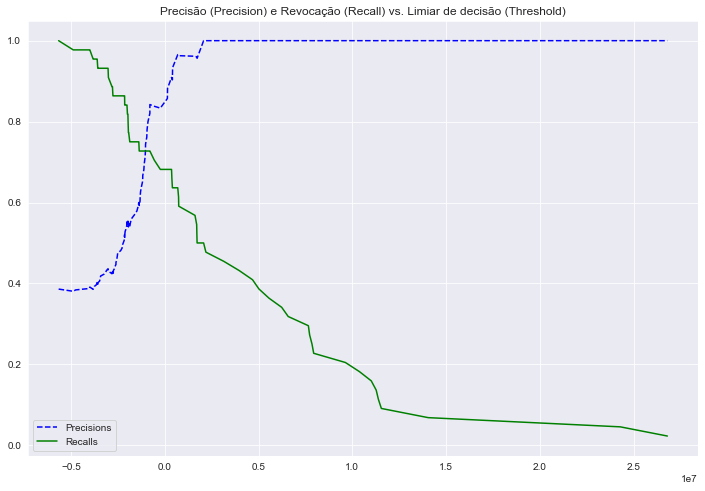

In [422]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.legend()
plt.show()

- **Note que nesse caso é preferível um alto grau de Recall (revocação)**. Não queremos que uma pessoa que possui um tumor maligno passe despercebida pelo exame. Nesse sentido, o que poderia ocorrer devido ao trade-off é que algumas pessoas acabariam tendo alertar de falsos positivos, porém não deixaríamos de alertar uma pessoa que tem cancer que ela realmente tem. 

### ROC Curve (Curva de Característica de Operação)

In [393]:
# fpr - false positive rate
# tpr - true positive rate
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_scores_sgd)

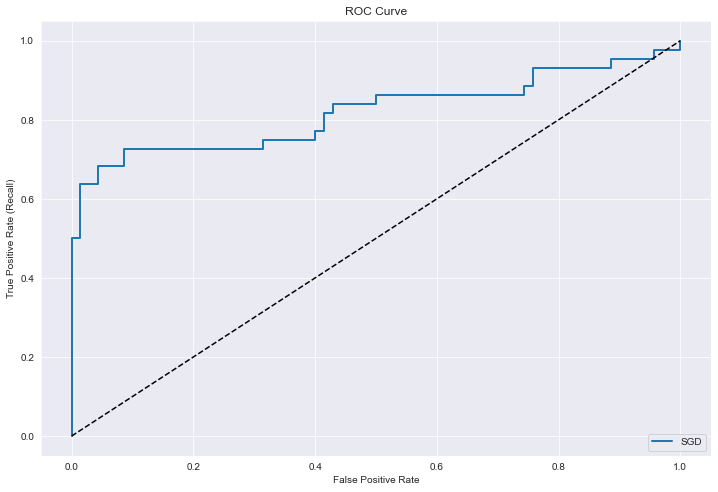

In [400]:
plt.figure(figsize=(12, 8))
plot_roc_curve(fpr_sgd, tpr_sgd, 'SGD')
plt.legend(loc='lower right')
plt.show()

## SVM (Support Vector Machine)

Um máquina de vetor de suporte (SVM) é um modelo de Machine Learning bastante utilizado pela sua versatilidade. É capaz de fazer classificações lineares ou não lineares, de regressão e até mesmo de detecção de outliers. As SMVs são bastante úteis pela sua adaptabilidade de classificação em conjuntos complexos de pequeno ou médio porte.

### Classificação Linear da SVM

Para explicar melhor como funciona a ideia fundamental da SVM, é bastante prudente utilizar imagens. Portanto, acompanhe a figura que vamos gerar, que mostra a separabilidade de duas classes que possuem separabilidade linear:

In [425]:
# Importa a biblioteca e o modelo
from sklearn.svm import SVC

# Importa o data set que iremos utilizar para a demonstração
from sklearn import datasets

# Iris é um dataset bastante famoso em Machine Learning, utilizaremos ele para demonstrar a funcionalidade da SVM linear
iris = datasets.load_iris()
X_iris = iris["data"][:, (2, 3)] 
y_iris = iris["target"]

# Separa os tipos de plantas (Versicolor e Setosa são os tipos)
setosa_or_versicolor = (y_iris == 0) | (y_iris == 1)
X_iris = X_iris[setosa_or_versicolor]
y_iris = y_iris[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_iris, y_iris)

SVC(C=inf, kernel='linear')

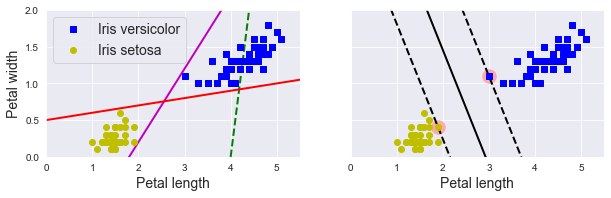

In [426]:
# Modelos ruins para comparação
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X_iris[:, 0][y_iris==1], X_iris[:, 1][y_iris==1], "bs", label="Iris versicolor")
plt.plot(X_iris[:, 0][y_iris==0], X_iris[:, 1][y_iris==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X_iris[:, 0][y_iris==1], X_iris[:, 1][y_iris==1], "bs")
plt.plot(X_iris[:, 0][y_iris==0], X_iris[:, 1][y_iris==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#save_fig("large_margin_classification_plot")
plt.show()

Note que claramente podemos visualizar a separação das duas classes (Nossos targets): 
- `Iris Versicolor`
- `Iris Setosa`

Para ilustrar, a figura da esquerda mostra 3 classificadores ruins para separar os tipos de plantas de acordo com o tamanho e a largura da pétala (Nossas features). Em contrapartida, a imagem da direita claramente mostra um bom desempenho em separar as classes na linha sólida (fronteira de decisão), essa linha não apenas separa as duas classes, como também fica o mais longe possível das instâncias de treinamento mais próximas.

Observe que acrescentar novas instâncias de treinamento fora dessa faixa (linhas tracejadas) não afetará a fronteira de decisão: Ele se ajusta e totalmente determinada (ou "Compatível") com as instâncias localizadas nas margens da faixa tracejada (ou na "rua" assentada entre as retas). Essas instâncias são chamadas de **vetores de suporte** (circuladas na figura anterior).

### Aplicando SVM
Vamos aplicar a SVM agora na nossa aplicação:

In [428]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [432]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
for metrica in scoring_metrics:
    # Método K-fold de validação cruzada
    print('-------------Validação Cruzada para o conjunto completo-------------')
    print('')
    print(f'--------------------Métrica usada: {metrica}--------------------')
    lista_de_acuracia_treino = cross_val_score(svm_clf, X, y, cv=4, scoring=metrica)
    df_acuracia_treino = pd.DataFrame(lista_de_acuracia_treino)
    media_kfold_treino = df_acuracia_treino[0].mean()
    std_kfold_treino = df_acuracia_treino[0].std()
    print(f"Resultados obtidos a partir do método K-fold: {lista_de_acuracia_treino}")
    print(f"A média dos scores: {media_kfold_treino}")
    print(f"O desvio padrão dos scores: {std_kfold_treino}")
    print('')

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: accuracy--------------------
Resultados obtidos a partir do método K-fold: [0.85314685 0.91549296 0.94366197 0.93661972]
A média dos scores: 0.9122303752585442
O desvio padrão dos scores: 0.041167512867878064

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: f1_micro--------------------
Resultados obtidos a partir do método K-fold: [0.85314685 0.91549296 0.94366197 0.93661972]
A média dos scores: 0.9122303752585443
O desvio padrão dos scores: 0.041167512867878085

-------------Validação Cruzada para o conjunto completo-------------

--------------------Métrica usada: f1_macro--------------------
Resultados obtidos a partir do método K-fold: [0.82872298 0.90459127 0.93880629 0.9314488 ]
A média dos scores: 0.9008923344569855
O desvio padrão dos scores: 0.05030991849265036

-------------Validação Cruzada para o conjunto completo-

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        70
           1       0.95      0.84      0.89        44

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Training Score: 92.09 %
Test Score: 92.11 %


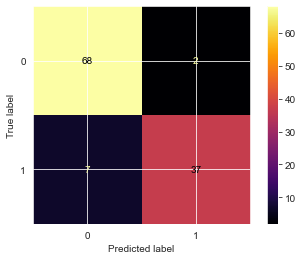

In [433]:
y_pred_svm = svm_clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test, y_pred_svm))
#print(confusion_matrix(y_test, y_pred_svm))
print(f"Training Score: {svm_clf.score(X_train, y_train) * 100:.2f} %")
print(f"Test Score: {svm_clf.score(X_test, y_test) * 100:.2f} %")
plot_confusion_matrix(svm_clf, X_test, y_test, cmap='inferno')
plt.show()

### AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(base_estimator = None)
adb_clf.fit(X_train,y_train)

In [ ]:
y_pred_adb = adb_clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test, y_pred_adb))
#print(confusion_matrix(y_test, y_pred_adb))
print(f"Training Score: {adb_clf.score(X_train, y_train) * 100:.2f} %")
print(f"Test Score: {adb_clf.score(X_test, y_test) * 100:.2f} %")
plot_confusion_matrix(adb_clf, X_test, y_test, cmap='inferno')
plt.show()

### KNeighborsClassifier

In [ ]:
pd.DataFrame

## Deep Learning

In [ ]:
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.models import Sequential
# import keras
# import keras.utils
# from keras import utils as np_utils

# Rúbrica

1) **(OK!)** A análise exploratória, além de bem feita, conta com amplos recursos gráficos que permitem entender bem o dataset quanto à distribuição, outliers e ocorrências conjuntas 

2) **(OK!)** Existe um histórico bem documentado de tentativas de se melhorar a performance do projeto. Deve-se registrar a cada passo qual foi a performance, quais foram as atitudes tomadas para melhorar e os novos resultados 

3) **(OK!)** Aprofundou-se em técnicas de análise de desempenho, utilizando outras métricas de avaliação de desempenho além da matriz de confusão e interpretação de coeficientes de regressão. 

4) **(OK!)** Registrou o processo de aperfeiçoar o resultado, justificando decisões que foram tomadas pelo grupo e levando em conta o tipo de técnica analisada 

5) **(OK!)** Demonstrou domínio da técnica usada, relacionando aspectos conceituais com o que foi observado nos dados e nas respostas fornecidas pelo sistema

6) **(OK!)** Investiu em melhorar a explicação do trabalho usando técnicas de visualização mais avançadas (por exemplo usando Plot.ly, Seaborn, etc) 

7) ~ Propôs um programa para facilitar ao usuário final usar o sistema fora do Jupyter. Por exemplo, usuário escreve um tweet e seu programa responde dizendo se este tweet é relevante ou irrelevante.

8) **(OK!)** Comparou mais de duas técnicas para resolver o mesmo problema e apresentou os resultados

9) **(OK!)** Fez o processo de Validação Cruzada, calculou a performance média e desvio padrão para treinamento e teste. Discutiu com riqueza de detalhes.

ATENÇÃO: Itens 8) e 9) contam como conceito C para grupos co

## Reference:

-  [Yuefeng Zhang, PhD. Deep Learning in Wisconsin Breast Cancer Diagnosis](https://towardsdatascience.com/deep-learning-in-winonsin-breast-cancer-diagnosis-6bab13838abd)

-  [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

- [Nuclear feature extraction for breast tumor diagnosis]()

- [Mãos à Obra: Aprendizado de Máquina com scikit-Learn, Keras e TensorFlow. Aurélien Géron]()